<table align="center" width=50%>
    <tr>
        <td>
            <div align="center">
                <font color="#7F0542 ">
                    <b><h1>Forcasting</h1>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# **Problem Statement: 📈**

Forecasting the number of views of 145k wikipedia pages based on 550 days per page view report so that we can predict and optimize the ad placement for the clients of an ad infrastructure company helping businesses elicit maximum clicks @ minimum cost. Performance report of the ads on pages in different languages will help as the clients belong to different regions.

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data & Data Formatting](#Read_Data)**
4. **[Exploratory Data Analysis](#data_preparation)**
5. **[Checking stationarity](#stat_check)**
6. **[ARIMA, SARIMAX](#model)**
7. **[FB Prophet](#prophet)**
8. **[Pipeline](#pipe)**
9. **[Questionnaire](#Quest)**

# **1. Import Libraries** <a id='import_lib'></a>

In [106]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.pipeline import Pipeline

# **2. Set Options** <a id='set_options'></a>

In [3]:
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('white')
plt.rcParams['figure.figsize'] = (20, 6)

# **3. Read Data & Data Formatting**<a id='Read_Data'></a>

In [4]:
#importing data set

df = pd.read_csv('train_1.csv')

In [5]:
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider       18.00       11.00   
1             2PM_zh.wikipedia.org_all-access_spider       11.00       14.00   
2              3C_zh.wikipedia.org_all-access_spider        1.00        0.00   
3         4minute_zh.wikipedia.org_all-access_spider       35.00       13.00   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0        5.00       13.00       14.00        9.00        9.00       22.00   
1       15.00       18.00       11.00       13.00       22.00       11.00   
2        1.00        1.00        0.00        4.00        0.00        3.00   
3       10.00       94.00        4.00       26.00       14.00        9.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  2015-07-14  \
0       26.00       24.00       19.00       10.00       14.00       15.00   
1       10.00        4.00       41.00       65.00       57.00       38.00   
2        4.00        4.00        1.00        1.00        1.00        6.00   
3       11.00       16.00       16.00       11.00       23.00      145.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  \
0        8.00       16.00        8.00        8.00       16.00        7.00   
1       20.00       62.00       44.00       15.00       10.00       47.00   
2        8.00        6.00        4.00        5.00        1.00        2.00   
3       14.00       17.00       85.00        4.00       30.00       22.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  \
0       11.00       10.00       20.00       18.00       15.00       14.00   
1       24.00       17.00       22.00        9.00       39.00       13.00   
2        3.00        8.00        8.00        6.00        6.00        2.00   
3        9.00       10.00       11.00        7.00        7.00       11.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  2015-08-01  \
0       49.00       10.00       16.00       18.00        8.00        5.00   
1       11.00       12.00       21.00       19.00        9.00       15.00   
2        2.00        3.00        2.00        4.00        3.00        3.00   
3        9.00       11.00       44.00        8.00       14.00       19.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  2015-08-07  \
0        9.00        7.00       13.00        9.00        7.00        4.00   
1       33.00        8.00        8.00        7.00       13.00        2.00   
2        5.00        3.00        5.00        4.00        2.00        5.00   
3       10.00       17.00       17.00       10.00        7.00       10.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  2015-08-13  \
0       11.00       10.00        5.00        9.00        9.00        9.00   
1       23.00       12.00       27.00       27.00       36.00       23.00   
2        1.00        4.00        5.00        0.00        0.00        7.00   
3        1.00        8.00       27.00       19.00       16.00        2.00   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  2015-08-19  \
0        9.00       13.00        4.00       15.00       25.00        9.00   
1       58.00       80.00       60.00       69.00       42.00      161.00   
2        3.00        5.00        1.00        6.00        2.00        5.00   
3       84.00     

In [6]:
df.tail()

Page  2015-07-01  \
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  2015-07-10  2015-07-11  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-12  2015-07-13  2015-07-14  2015-07-15  2015-07-16  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-17  2015-07-18  2015-07-19  2015-07-20  2015-07-21  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-08-01  2015-08-02  2015-08-03  2015-08-04  2015-08-05  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-08-06  2015-08-07  2015-08-08  2015-08-09  2015-08-10  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-08-11  2015-08-12  2015-08-13  2015-08-14  2015-08-15  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN      

In [7]:
df.shape

(145063, 551)

In [8]:
df = df.dropna(how='all')
df = df.drop_duplicates()
df.shape

(145063, 551)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 610.9+ MB


In [10]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [11]:
print('Total number of days from 2015-07-01 to 2016-12-31')
31+31+30+31+30+31+366

Total number of days from 2015-07-01 to 2016-12-31


550

In [12]:
exog = pd.read_csv('Exog_Campaign_eng.csv')

In [13]:
exog.head()

Exog
0     0
1     0
2     0
3     0
4     0

In [14]:
exog.tail()

Exog
545     1
546     1
547     1
548     0
549     0

In [15]:
exog.shape

(550, 1)

In [16]:
exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


**Data Overview**

1. **train**
    - There are 145063 rows and 551 columns in the dataset
    - Each row represents a web page and the number of visits on days starting from 2015-07-01 to 2016-12-31
    - First column page contains page name, language and other details. Remaining 550 columns are numerical and type float
    - Missing values are present for page visit counts and could be because the page did not exist before<br><br>
    
2. **exog**
    - There are 550 rows and 1 column in the dataset
    - Each row is a boolean value represents whether there was a campaign or significant event that could affect the views
    - The column is of int data type
    - No missing values are present in the dataset<br><br>

# **4. Exploratory Data Analysis**<a id='data_preparation'></a>

In [17]:
#creating new feature Language

df['Language'] = df['Page'].apply(lambda s: s.split('.wikipedia.org')[0].split('_')[-1])

In [18]:
df['Language'].value_counts()

en            24108
ja            20431
de            18547
fr            17802
zh            17229
ru            15022
es            14069
all-agents    13556
spider         4299
Name: Language, dtype: int64

In [19]:
print(df[df['Language'] == 'all-agents']['Page'].iloc[50])
print(df[df['Language'] == 'spider']['Page'].iloc[50])

Category:Skins_based_on_Bootstrap_www.mediawiki.org_all-access_all-agents
Category:Astronomy_commons.wikimedia.org_all-access_spider


In [20]:
#dropping columns with no proper language

df_new = df[~((df['Language'] == 'all-agents') | (df['Language'] == 'spider'))]
df_new.head(2)

Page  2015-07-01  2015-07-02  \
0  2NE1_zh.wikipedia.org_all-access_spider       18.00       11.00   
1   2PM_zh.wikipedia.org_all-access_spider       11.00       14.00   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0        5.00       13.00       14.00        9.00        9.00       22.00   
1       15.00       18.00       11.00       13.00       22.00       11.00   

   2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  2015-07-14  \
0       26.00       24.00       19.00       10.00       14.00       15.00   
1       10.00        4.00       41.00       65.00       57.00       38.00   

   2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  \
0        8.00       16.00        8.00        8.00       16.00        7.00   
1       20.00       62.00       44.00       15.00       10.00       47.00   

   2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  \
0       11.00       10.00       20.00       18.00       15.00       14.00   
1       24.00       17.00       22.00        9.00       39.00       13.00   

   2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  2015-08-01  \
0       49.00       10.00       16.00       18.00        8.00        5.00   
1       11.00       12.00       21.00       19.00        9.00       15.00   

   2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  2015-08-07  \
0        9.00        7.00       13.00        9.00        7.00        4.00   
1       33.00        8.00        8.00        7.00       13.00        2.00   

   2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  2015-08-13  \
0       11.00       10.00        5.00        9.00        9.00        9.00   
1       23.00       12.00       27.00       27.00       36.00       23.00   

   2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  2015-08-19  \
0        9.00       13.00        4.00       15.00       25.00        9.00   
1       58.00       80.00       60.00       69.00       42.00      161.00   

   2015-08-20  2015-08-21  2015-08-22  2015-08-23  2015-08-24  2015-08-25  \
0        5.00        6.00       20.00        3.00       14.00       46.00   
1       94.00       77.00       78.00       20.00       24.00       13.00   

   2015-08-26  2015-08-27  2015-08-28  2015-08-29  2015-08-30  2015-08-31  \
0        5.00        5.00       13.00        4.00        9.00       10.00   
1       14.00       26.00        8.00       82.00       22.00       11.00   

   2015-09-01  2015-09-02  2015-09-03  2015-09-04  2015-09-05  2015-09-06  \
0        9.00       11.00       11.00       11.00        9.00       15.00   
1       81.00       37.00        9.00       40.00       47.00       18.00   

   2015-09-07  2015-09-08  2015-09-09  2015-09-10  2015-09-11  2015-09-12  \
0        5.00       10.00        7.00        4.00        8.00        9.00   
1       23.00        6.00        2.00        7.00       16.00       10.00   

   2015-09-13  2015-09-14  2015-09-15  2015-09-16  2015-09-17  2015-09-18  \
0       10.00        6.00       13.00       16.00        6.00       24.00   
1       34.00       14.00       31.00       20.00       23.00       14.00   

   2015-09-19  2015-09-20  2015-09-21  2015-09-22  2015-09-23  2015-09-24  \
0        9.00       11.00       12.00        8.00       14.00        6.00   
1       16.00       34.00       15.00       30.00       13.00       30.00   

   2015-09-25  2015-09-26  2015-09-27  2015-09-28  2015-09-29  2015-09-30  \
0        6.00       11.00       14.00        6.00       10.00       20.00   
1       15.00       25.00       17.00        8.00       12.00       17.00   

   2015-10-01  2015-10-02  2015-10-03  2015-10-04  2015-10-05  2015-10-06  \
0        7.00       15.00        8.00       15.00        5.00        8.00   
1       10.00       21.00       18.00       30.00       13.00        7.00   

   2015-10-07  2015-10-08  2015-10-09  2015-10-10  2015-10-11  2015-10-12  \
0        8.00        5.00       11.00 

df_new.shape

In [21]:
print('Number of unique languages', df_new['Language'].nunique())
print(df_new['Language'].nunique(), 'time series forcasts')

Number of unique languages 7
7 time series forcasts


In [22]:
#group by languages, aggregate values by mean
#nan values will not be counted on taking groupby average effectively equals to daily mean imputation by language 

df_final = df_new.groupby('Language').mean()
df_final

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
Language                                                               
de            801.43      790.47      758.69      697.11      809.89   
en           4120.24     4096.97     3863.32     4020.39     4157.76   
es           1176.99     1125.93     1035.04      972.43     1056.35   
fr            526.62      530.04      509.43      544.35      534.10   
ja            637.64      732.30      661.19      830.49      796.90   
ru            694.49      706.67      654.07      615.88      655.27   
zh            306.17      306.18      304.71      307.11      326.37   

          2015-07-06  2015-07-07  2015-07-08  2015-07-09  2015-07-10  \
Language                                                               
de            890.10      863.25      876.39      842.16      785.14   
en           4462.85     4262.74     3990.76     4068.85     4043.52   
es           1204.10     1174.57     1139.17     1117.41     1015.60   
fr            556.16      537.88      527.82      522.00      492.68   
ja            694.06      675.27      671.19      653.87      679.39   
ru            704.85      688.64      684.36      701.55      804.52   
zh            328.69      328.07      336.21      333.69      347.03   

          2015-07-11  2015-07-12  2015-07-13  2015-07-14  2015-07-15  \
Language                                                               
de            726.60      861.90      938.98      895.89      835.98   
en           4070.14     4480.26     4432.33     4460.48     4120.77   
es            913.59     1040.57     1180.40     1239.63     1170.27   
fr            488.59      557.40      543.28      582.72      537.55   
ja            701.29      754.60      671.11      628.88      630.30   
ru            740.96      819.23      844.01      818.17      782.49   
zh            324.25      364.50      334.14      315.30      309.26   

          2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  \
Language                                                               
de            826.99      851.87     1000.64      945.78      867.19   
en           4170.40     3997.40     3867.98     4104.83     4285.88   
es           1115.12     1003.51      872.65      933.64     1097.36   
fr            525.55      505.30      512.23      554.65      541.16   
ja            719.78      861.41      724.74      710.64      710.40   
ru            798.41      787.38      706.21      781.70      802.07   
zh            308.15      309.38      322.68      362.76      341.38   

          2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  \
Language                                                               
de            806.40      823.09      800.59      758.98      753.47   
en           4072.90     3984.92     3913.22     3827.59     3839.77   
es           1086.99     1117.63     1049.10      931.91      834.87   
fr            526.72      530.11      498.99      466.57      467.95   
ja            620.36      622.49      591.60      538.00      524.39   
ru            780.37      761.15      685.20      607.94      554.13   
zh            335.11      339.26      301.44      262.63      252.55   

          2015-07-26  2015-07-27  2015-07-28  2015-07-29  2015-07-30  \
Language                                                               
de            789.00      844.20      836.17      833.43      797.63   
en           4138.80     4208.46     4113.84     4791.62     3772.63   
es            919.33     1059.80     1051.77     1063.49     1010.74   
fr            507.30      492.10      485.74      492.21      470.58   
ja            561.71      542.90      530.11      577.62      521.36   
ru            619.75      669.66      644.36      631.10      616.16   
zh            272.64      272.43      268.56      271.31      260.96   

          2015-07-31  2015-08-01  2015-08-02  2015-08-03  2015-08-04  \
Language                                    

In [23]:
#Taking transpose to make date index for forcast
#Converting lang codes to names

df_final = df_final.T
df_final.rename(columns={
    'de':'German', 'en':'English', 'es':'Spanish', 'fr':'French', 'ja':'Japanese', 'ru':'Russian', 'zh':'Chinese'
}, inplace=True)
df_final.index.names = ['Date']
df_final = df_final.reset_index()
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final.dtypes

Language
Date        datetime64[ns]
German             float64
English            float64
Spanish            float64
French             float64
Japanese           float64
Russian            float64
Chinese            float64
dtype: object

In [24]:
df_final.set_index('Date', inplace=True)
df_final

Language    German  English  Spanish  French  Japanese  Russian  Chinese
Date                                                                    
2015-07-01  801.43  4120.24  1176.99  526.62    637.64   694.49   306.17
2015-07-02  790.47  4096.97  1125.93  530.04    732.30   706.67   306.18
2015-07-03  758.69  3863.32  1035.04  509.43    661.19   654.07   304.71
2015-07-04  697.11  4020.39   972.43  544.35    830.49   615.88   307.11
2015-07-05  809.89  4157.76  1056.35  534.10    796.90   655.27   326.37
...            ...      ...      ...     ...       ...      ...      ...
2016-12-27 1095.85  6189.33  1138.87  861.95    804.68  1008.12   380.39
2016-12-28 1042.82  6032.64  1184.69  777.26    806.81   938.61   382.56
2016-12-29 1004.51  6425.30  1117.97  755.73    883.43   903.05   354.78
2016-12-30  958.36  5353.68   825.96  703.63    970.88   808.82   358.55
2016-12-31  900.88  5180.35   791.45  648.63   1222.55   886.74   369.83

[550 rows x 7 columns]

In [25]:
exog.value_counts()

Exog
0       496
1        54
dtype: int64

In [26]:
cols = list(df_final.columns)
cols

['German', 'English', 'Spanish', 'French', 'Japanese', 'Russian', 'Chinese']

In [27]:
#page visit count distribution

def distribution(lang):
    plt.subplot(121)
    sns.histplot(data = df_final, x = lang)
    
    plt.subplot(122)
    sns.boxplot(data = df_final, y = lang)
    
    plt.show()

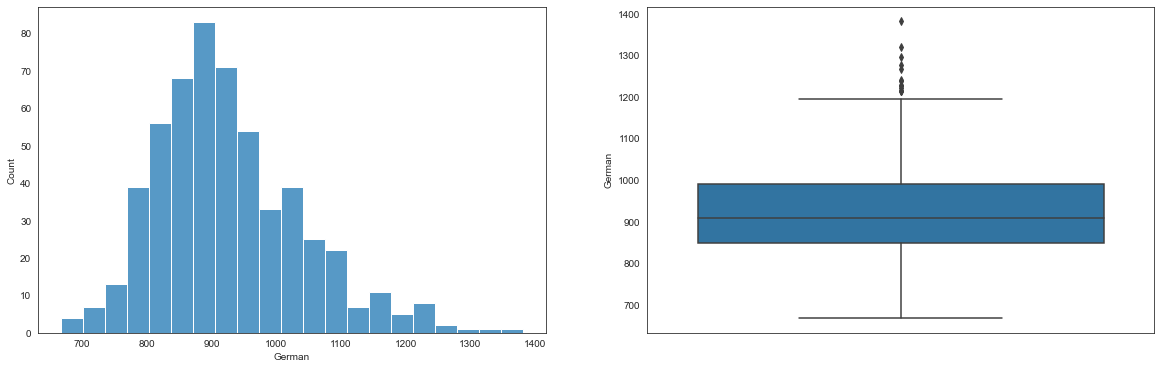

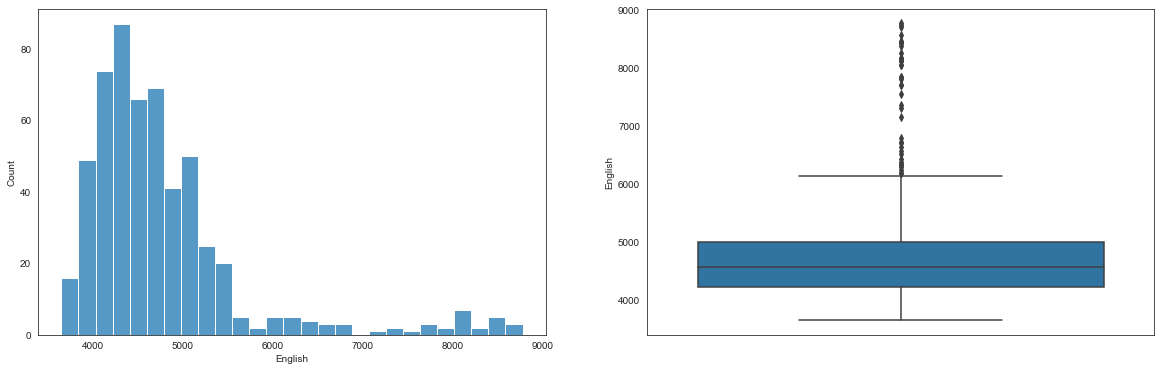

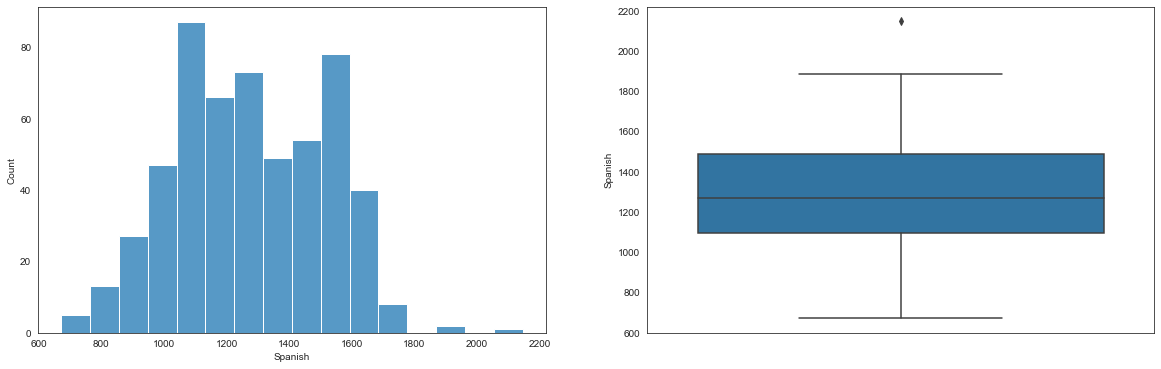

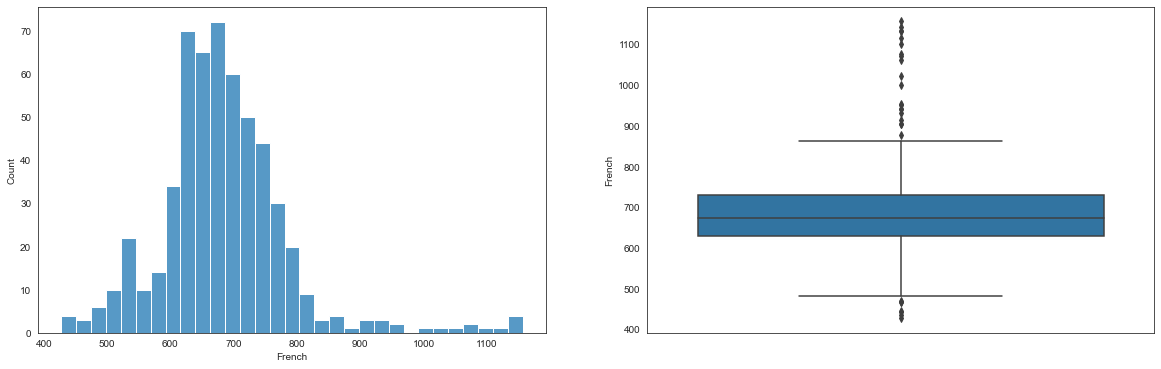

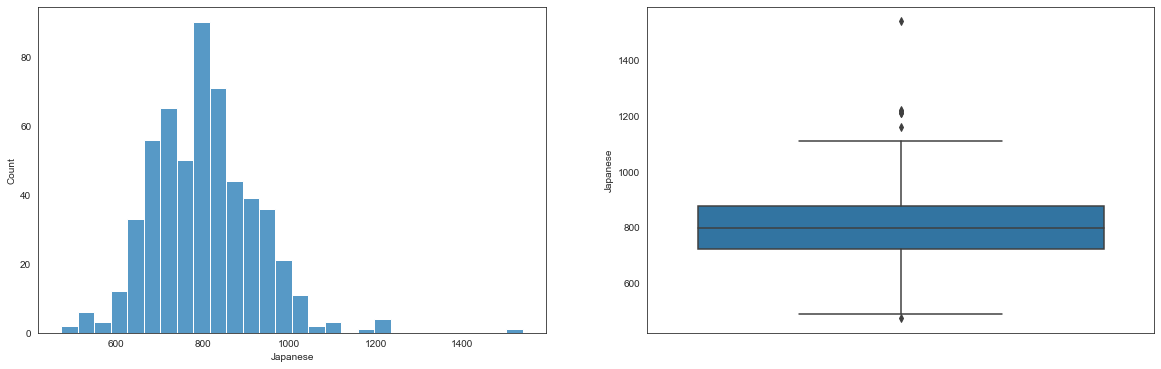

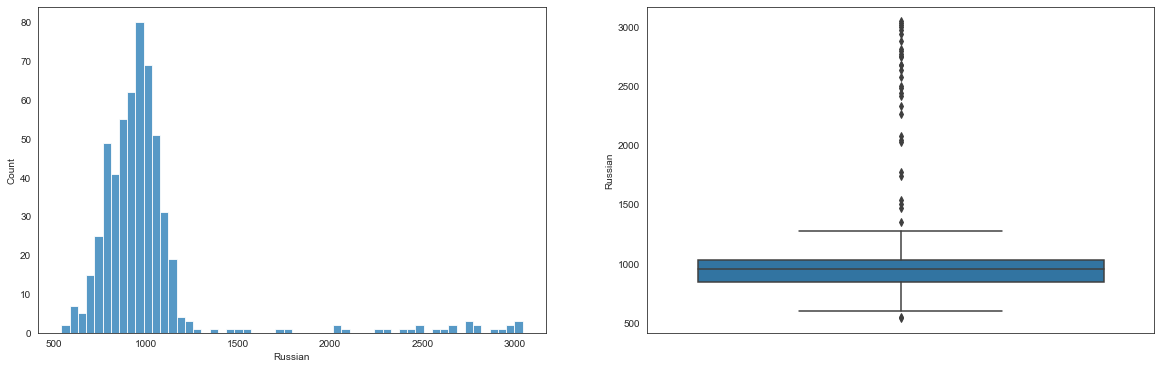

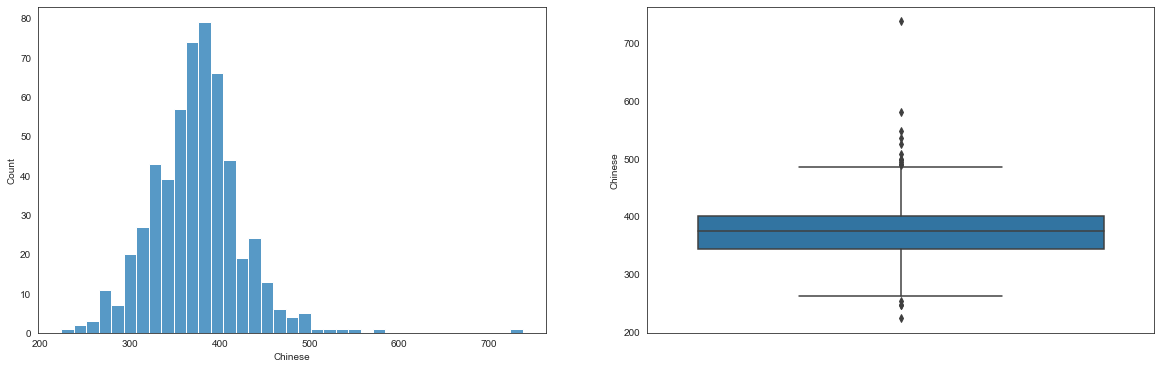

In [28]:
for lang in cols:
    distribution(lang)

In [29]:
#Plotting moving average to view smoothed graph (15 days average)

def moving_avg(lang):
    # Plot original data
    df_final[lang].plot(label='original')

    # Plot data after implementing Moving Averages
    df_final[lang].rolling(15).mean().plot(label='smoothed')

    plt.legend()
    plt.title(lang)
    plt.show()

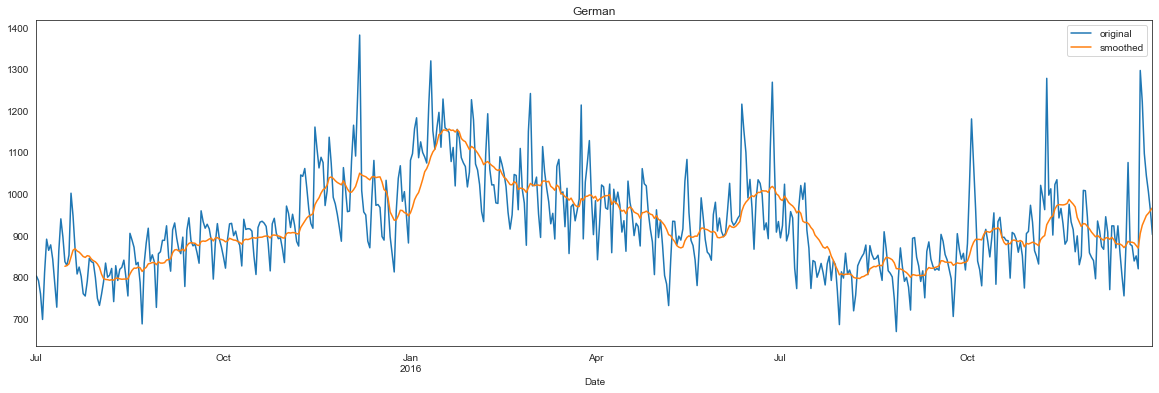

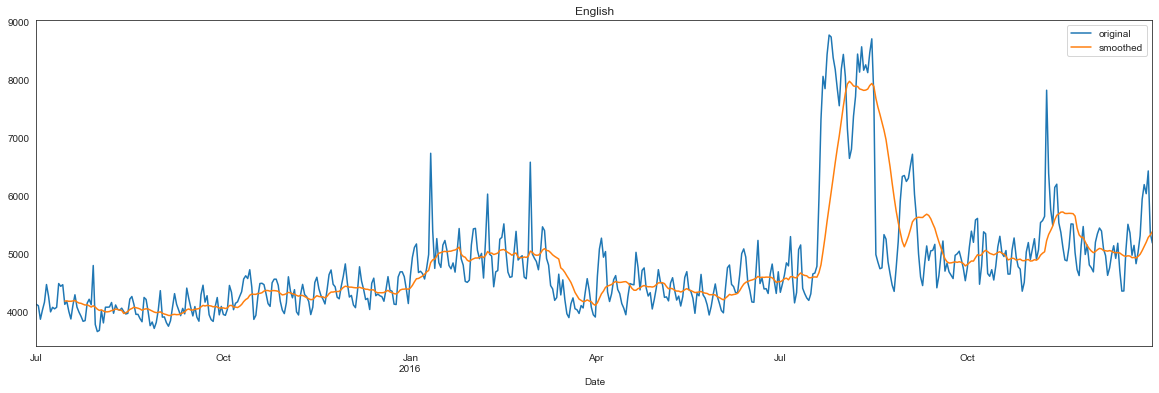

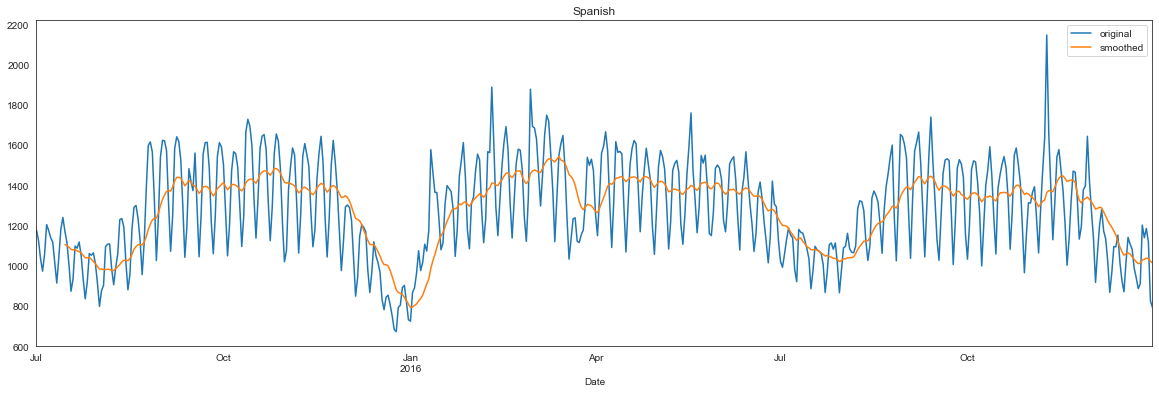

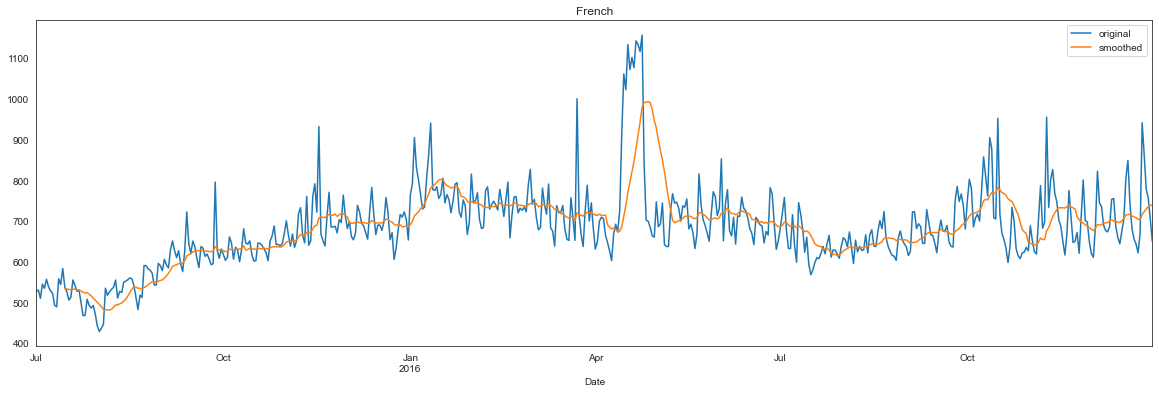

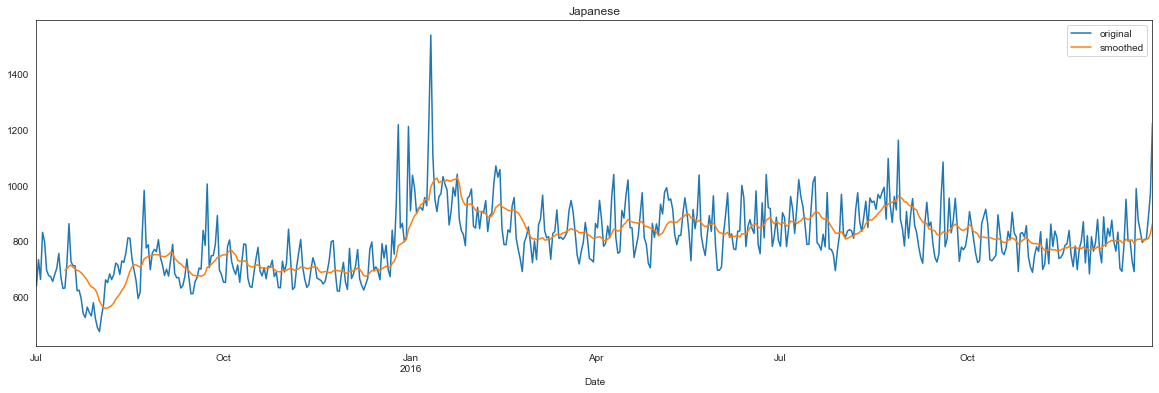

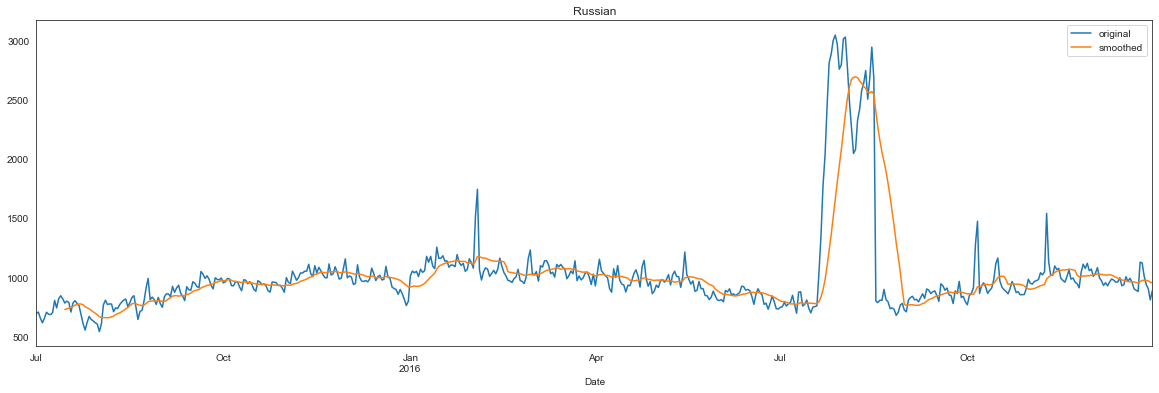

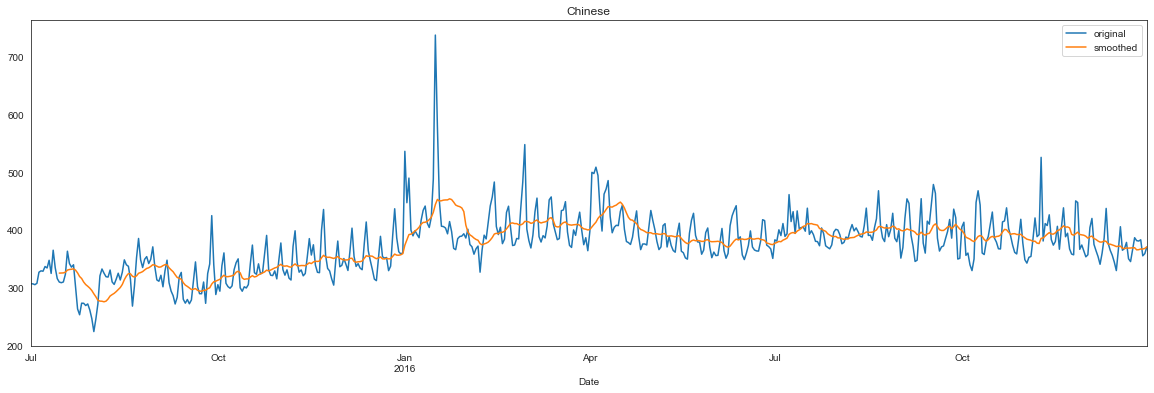

In [30]:
for lang in cols:
    moving_avg(lang)

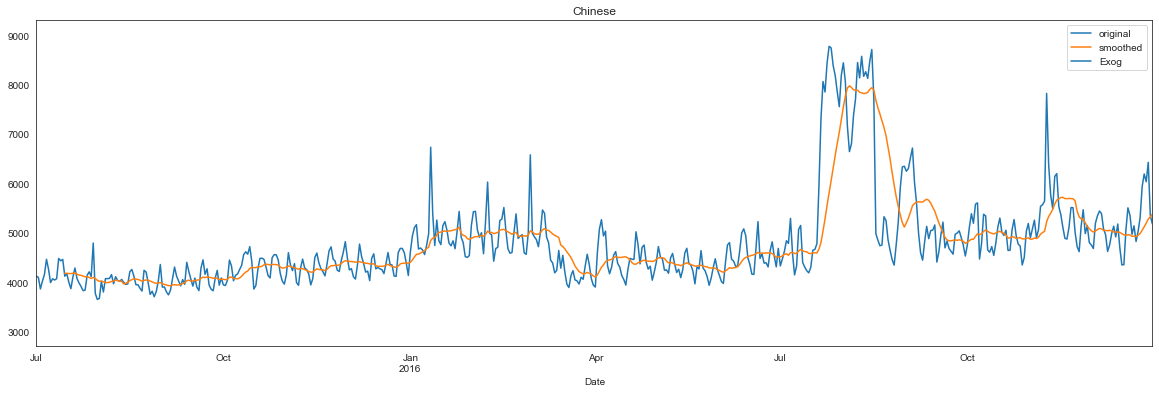

In [31]:
#checking the impack of exog variable
exog_new = exog.copy()
exog_new['Exog'] = exog_new['Exog'].map({0:3000, 1:9000})

# Plot original data
df_final['English'].plot(label='original')

# Plot data after implementing Moving Averages
df_final['English'].rolling(15).mean().plot(label='smoothed')
sns.lineplot(data=exog_new)

plt.legend()
plt.title(lang)
plt.show()

In [32]:
df_final.describe()

Language  German  English  Spanish  French  Japanese  Russian  Chinese
count     550.00   550.00   550.00  550.00    550.00   550.00   550.00
mean      925.71  4773.28  1275.66  682.07    803.49  1013.56   373.76
std       112.64   926.91   240.30  101.45    120.45   386.70    50.49
min       667.97  3650.30   672.22  427.84    473.83   541.81   223.39
25%       847.30  4216.63  1093.84  629.86    720.00   848.71   343.11
50%       908.34  4558.55  1267.25  674.27    796.96   956.73   373.97
75%       989.47  5000.27  1488.46  728.89    876.03  1034.41   400.82
max      1380.76  8772.51  2146.13 1156.12   1539.29  3043.20   737.62

### **Inferences**

1. German
    - Appears to be a stationary time-series
    - A small spike is observed in the beginning of the year 2016
    - 50 percent of the data lie between 850 to 990 with an average value 925<br><br>
2. English
    - Appears to be a stationary time-series
    - A big spike in page visit is found in the month of August, 2016
    - This spike can be explained using exog variable
    - 50 percent of the data lie between 4220 to 5000 with an average value 4775<br><br>
3. Spanish
    - Looks like there is some seasonality
    - chances are that it is stationary as the seasonality is not in regular intervals
    - 50 percent of the data lie between 1090 to 1490 with an average value 1275<br><br>
4. French
    - Appears to be a stationary time-series
    - A spike is observed in March-April, 2016
    - 50 percent of the data lie between 630 to 730 with an average value 680<br><br>
5. Japanese
    - Appears to be a stationary time-series
    - A small spike is observed in the beginning of the year 2016
    - 50 percent of the data lie between 720 to 875 with an average value 805<br><br>
6. Russian
    - Appears to be a stationary time-series
    - A big spike in page visit is found in the month of August, 2016
    - 50 percent of the data lie between 850 to 1035 with an average value 1015<br><br>
7. Chinese
    - Appears to be a stationary time-series
    - A small spike is observed in the beginning of the year 2016
    - 50 percent of the data lie between 345 to 400 with an average value 375
    
- English pages have a significantly higher number of visits and pages in Mandarin have the least number of visits

# **5. Checking stationarity**<a id='stat_check'></a>

### **Dickey Fuller Test**

In [33]:
def adf_test(lang):
    print(lang)
    pvalue = sm.tsa.stattools.adfuller(df_final[lang])[1]
    print('pvalue', pvalue.round(3))
    if pvalue <= 0.05:
      print('Sequence is stationary')
    else:
      print('Sequence is not stationary')

In [34]:
for lang in cols:
    adf_test(lang)
    print()

German
pvalue 0.12
Sequence is not stationary

English
pvalue 0.106
Sequence is not stationary

Spanish
pvalue 0.033
Sequence is stationary

French
pvalue 0.027
Sequence is stationary

Japanese
pvalue 0.048
Sequence is stationary

Russian
pvalue 0.002
Sequence is stationary

Chinese
pvalue 0.218
Sequence is not stationary



### **Decomposition**

In [35]:
def decomposition(lang):
    print(lang)
    model = sm.tsa.seasonal_decompose(df_final[lang], model='additive')
    model.plot();
    plt.show()

German


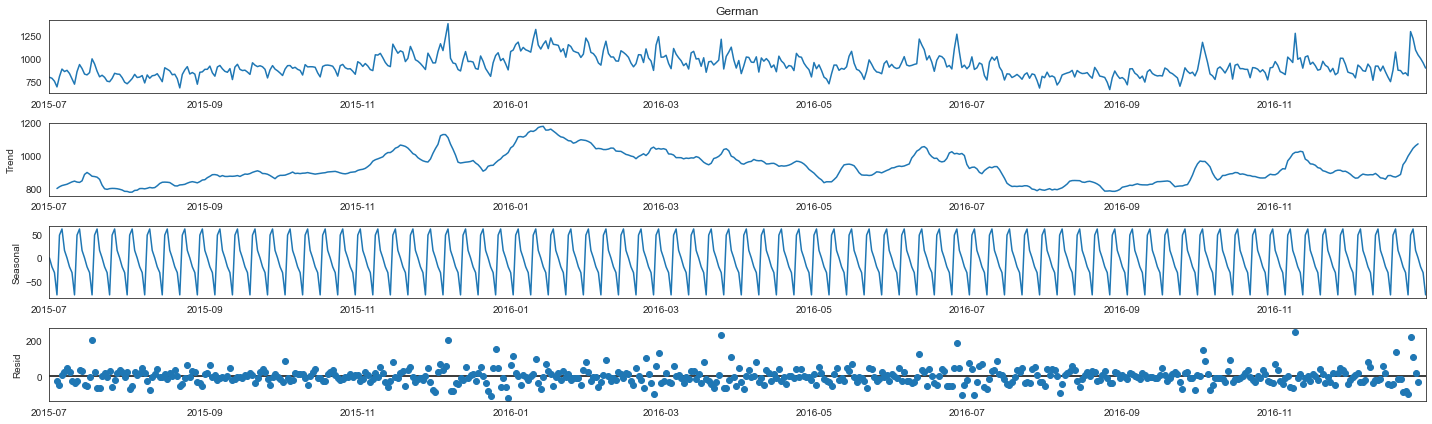

English


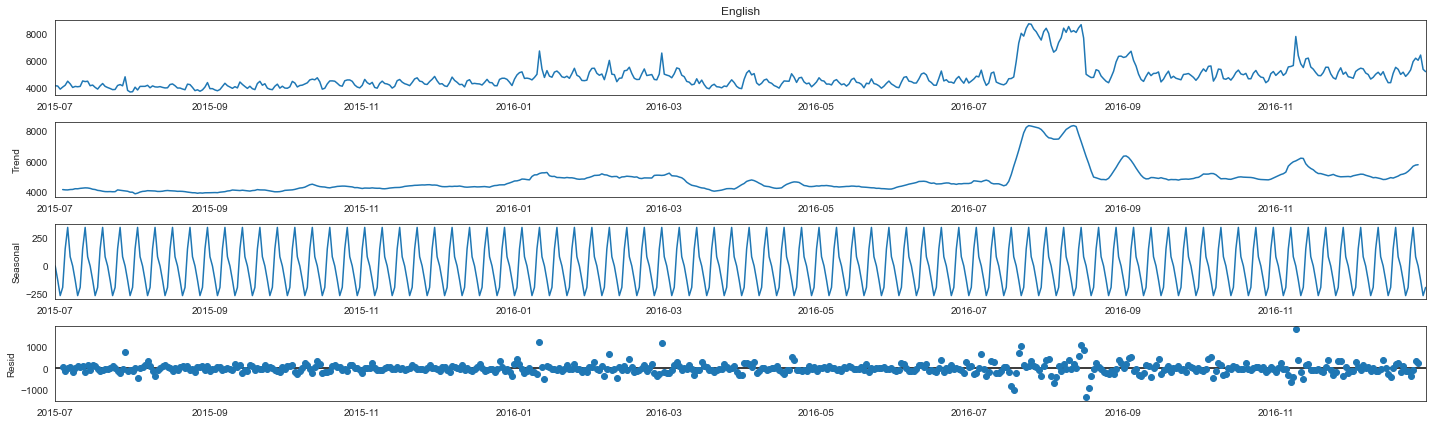

Spanish


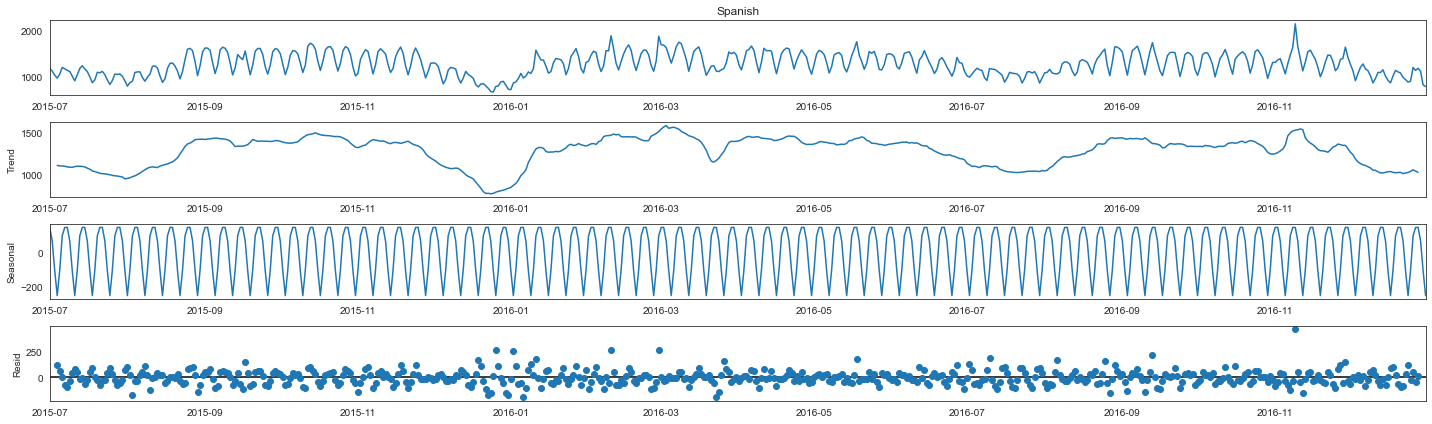

French


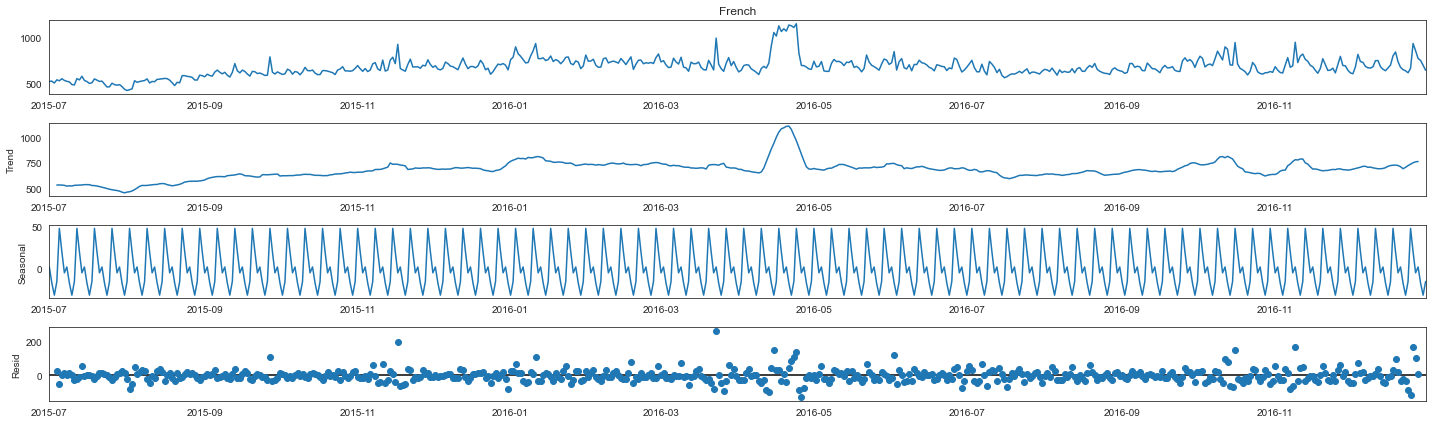

Japanese


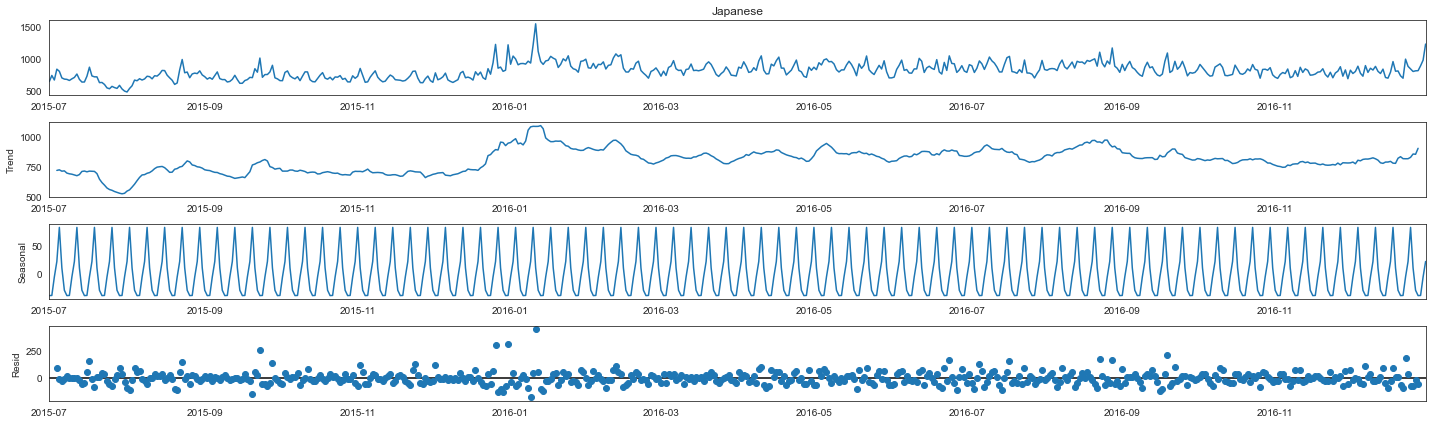

Russian


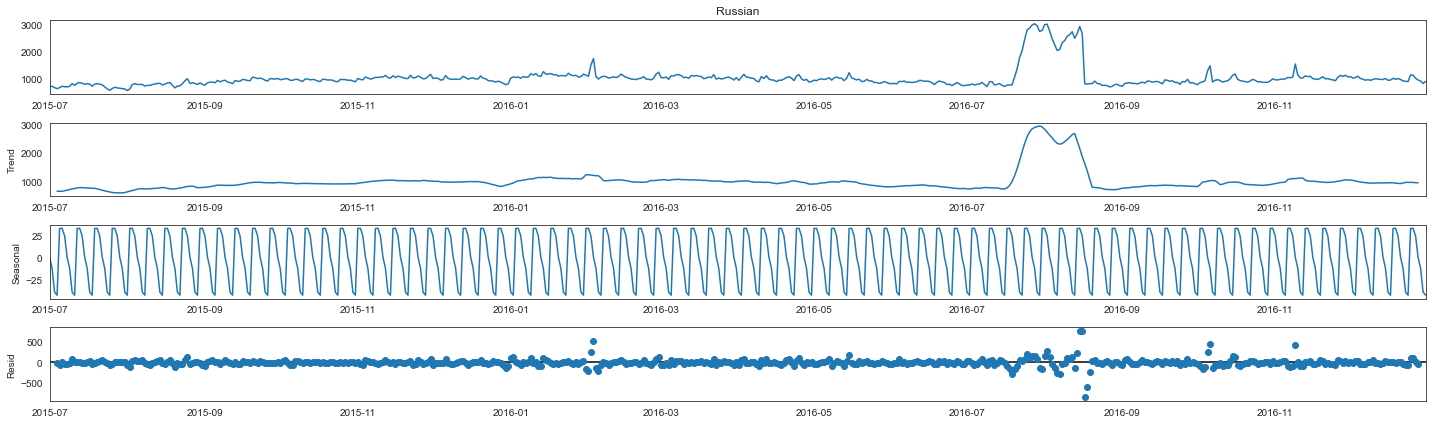

Chinese


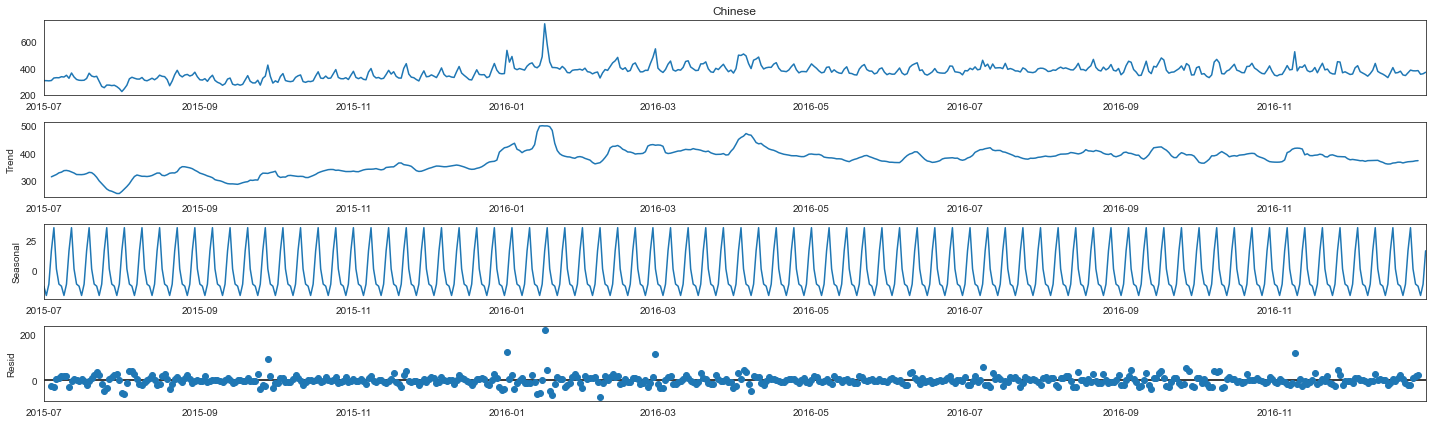

In [36]:
for lang in cols:
    decomposition(lang)

### **Differencing**

In [37]:
def differencing(lang):
    print(lang)
    #differencing
    plt.subplot(211)
    df_final[lang].diff().plot()
    plt.show()
    #dickey fuller test on differenced series
    print('pvalue: daily differencing', sm.tsa.stattools.adfuller(df_final[lang].diff().dropna())[1])
    #monthly differencing
    
    plt.subplot(211)
    df_final[lang].diff(1).diff(30).plot()
    plt.show()
    print('pvalue: monthly differencing', sm.tsa.stattools.adfuller(df_final[lang].diff(1).diff(30).dropna())[1])

German


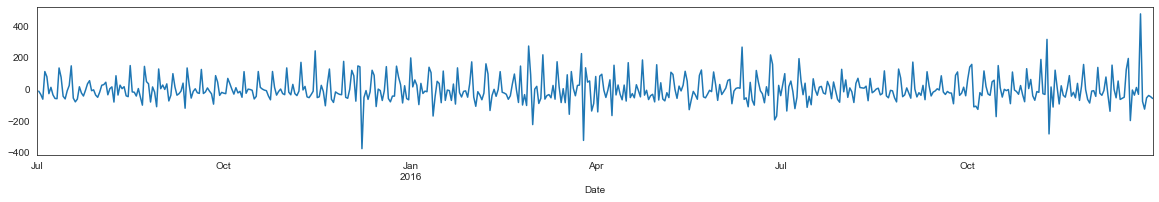

pvalue: daily differencing 1.836231080255647e-10


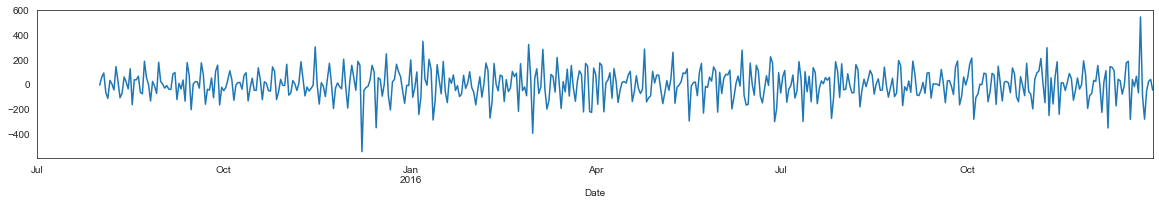

pvalue: monthly differencing 1.0230353647137855e-09

English


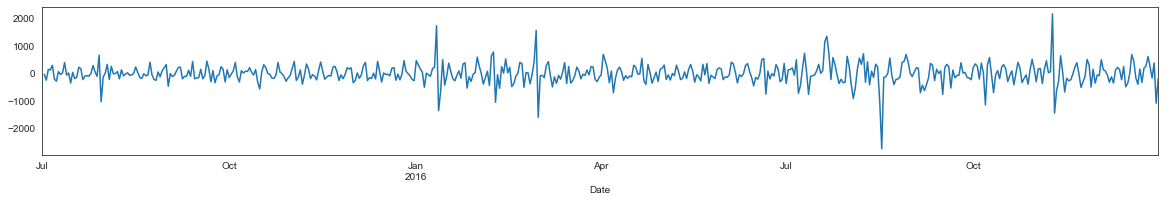

pvalue: daily differencing 3.2130335388918874e-13


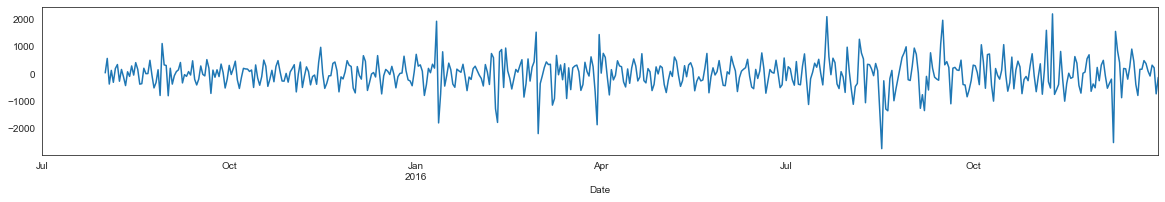

pvalue: monthly differencing 6.848784422049692e-13

Spanish


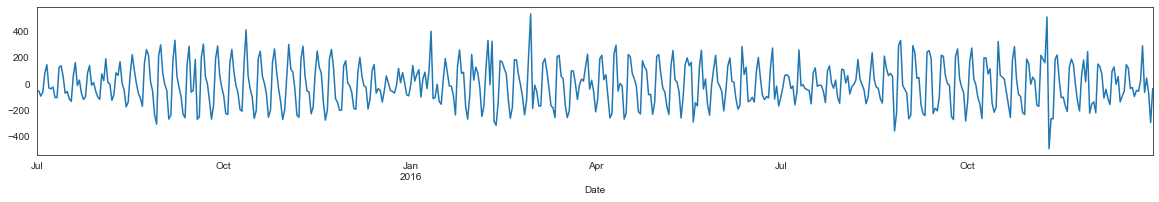

pvalue: daily differencing 1.8478325155410535e-07


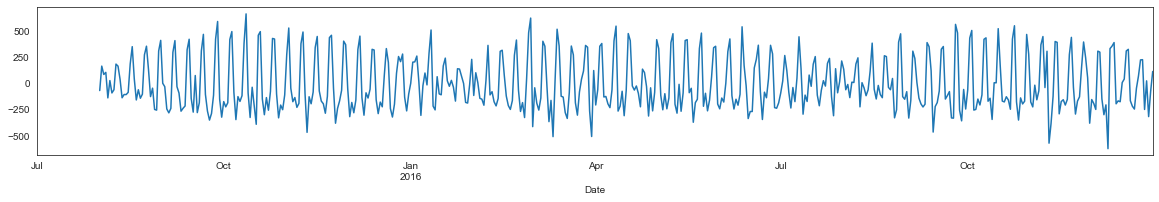

pvalue: monthly differencing 1.3433808609802146e-06

French


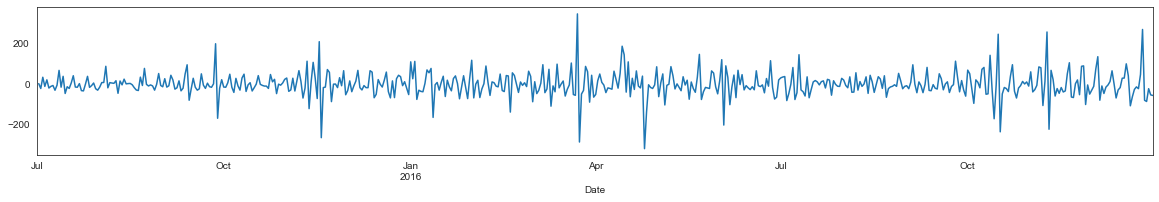

pvalue: daily differencing 1.1122769356002701e-17


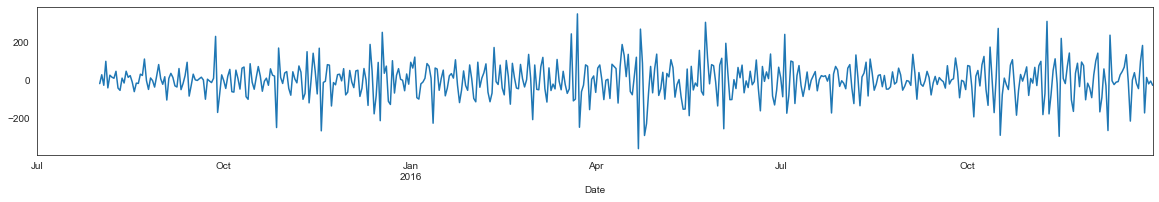

pvalue: monthly differencing 2.678510484735387e-18

Japanese


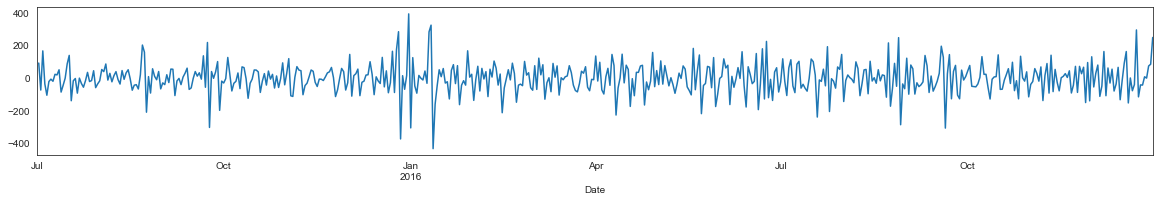

pvalue: daily differencing 7.052146143258522e-20


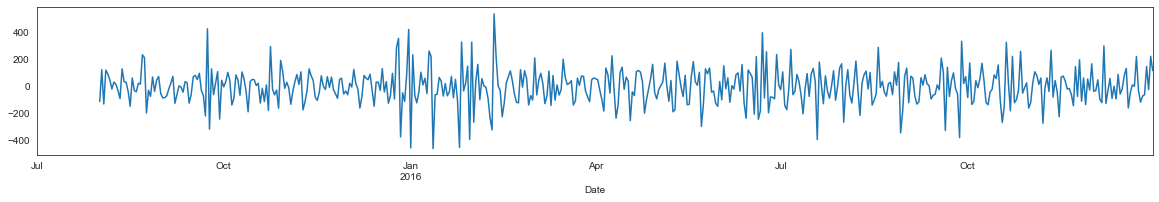

pvalue: monthly differencing 2.031202519857029e-13

Russian


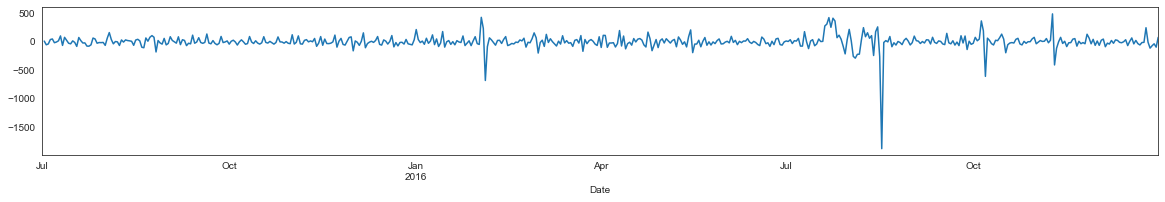

pvalue: daily differencing 2.4045310647974518e-30


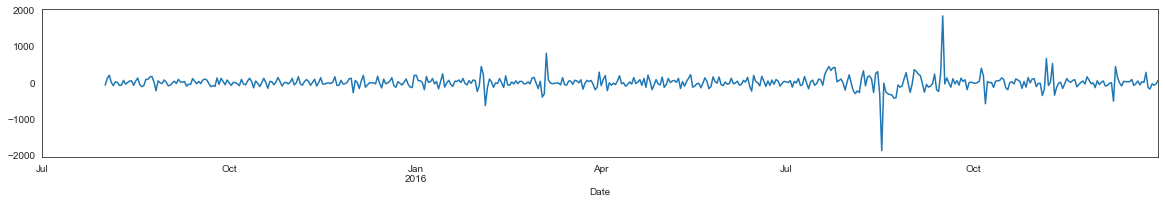

pvalue: monthly differencing 3.1403200044996006e-07

Chinese


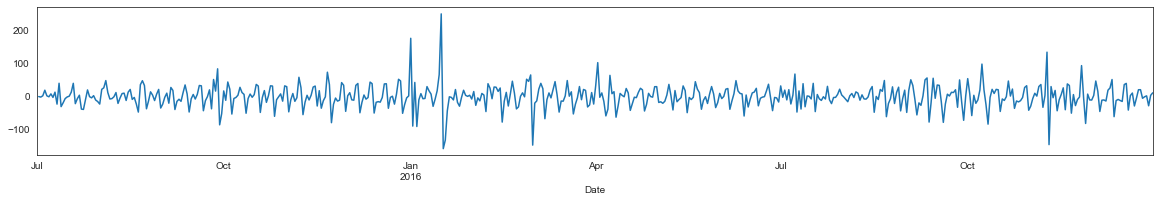

pvalue: daily differencing 1.916881965150871e-11


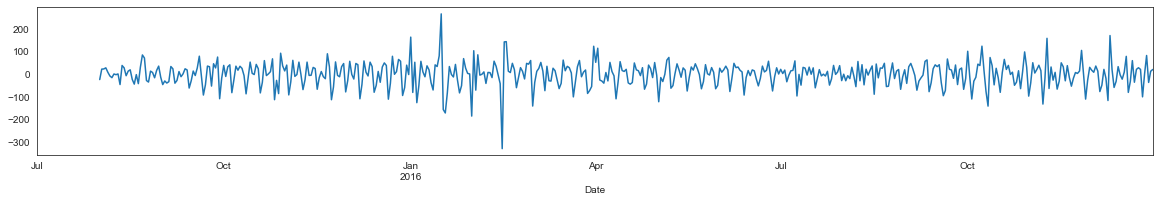

pvalue: monthly differencing 2.47375231461543e-11



In [38]:
for lang in cols:
    differencing(lang)
    print()

# **6. Creating model training and forecasting with ARIMA, SARIMAX**<a id='model'></a>

### **ACF and PACF plot**

In [39]:
def acf_pacf(lang):
    print(lang)
    
    #acf
    plot_acf(df_final[lang])
    
    #pacf
    plot_pacf(df_final[lang])
    plt.show()

German


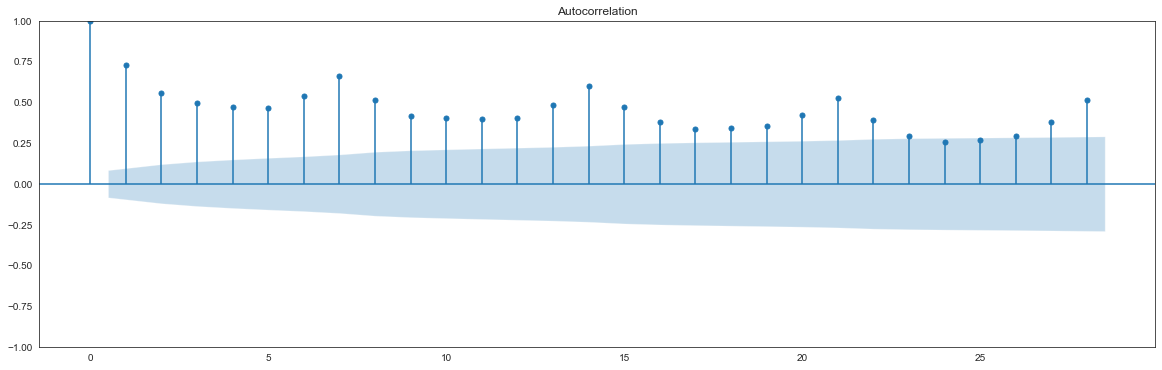

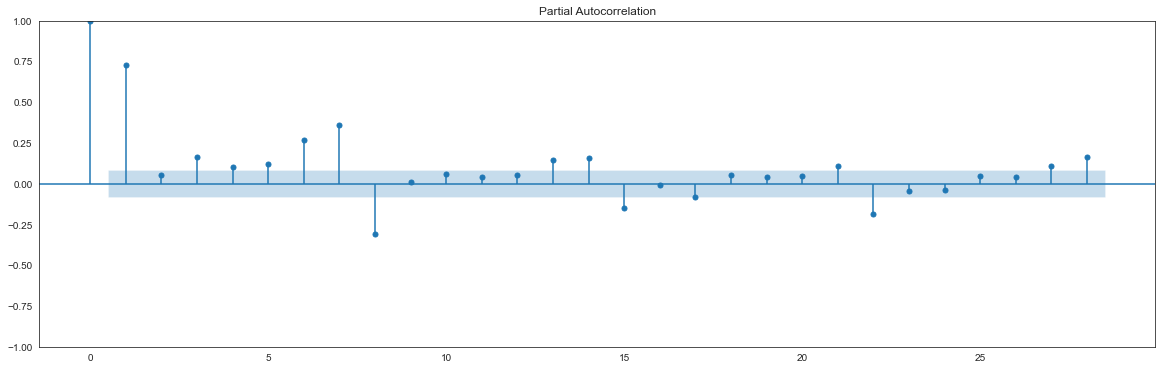

English


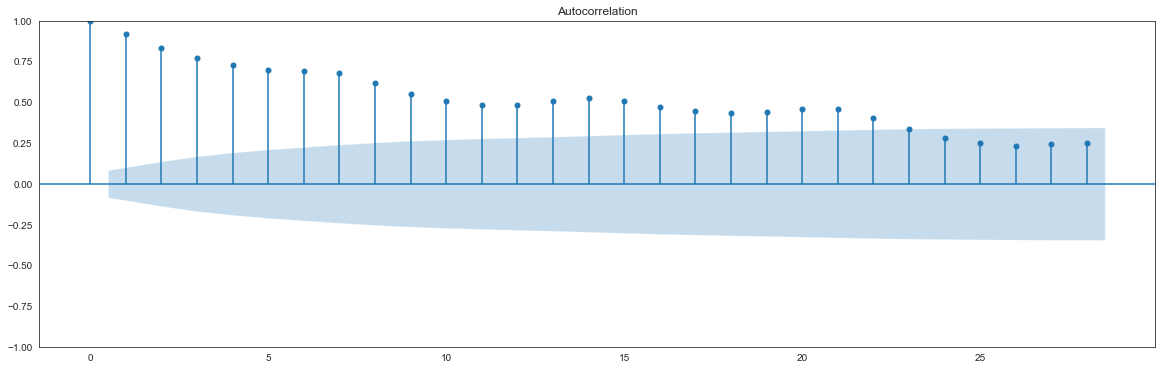

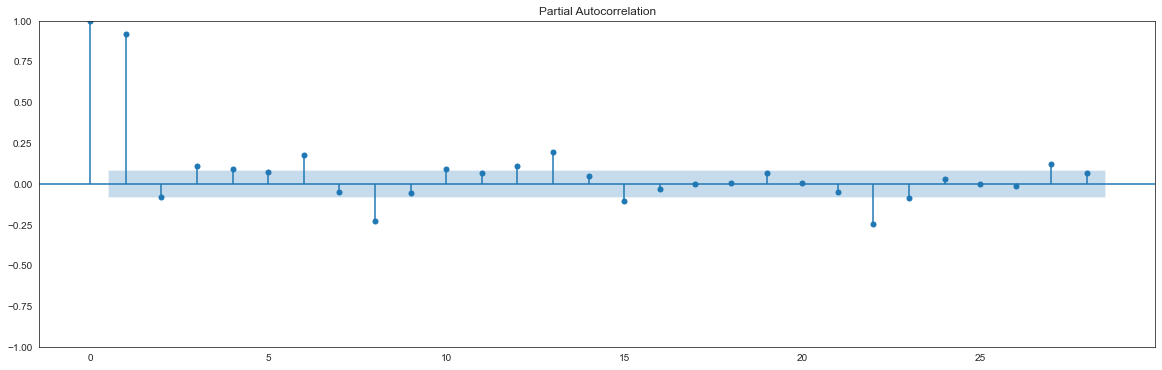

Spanish


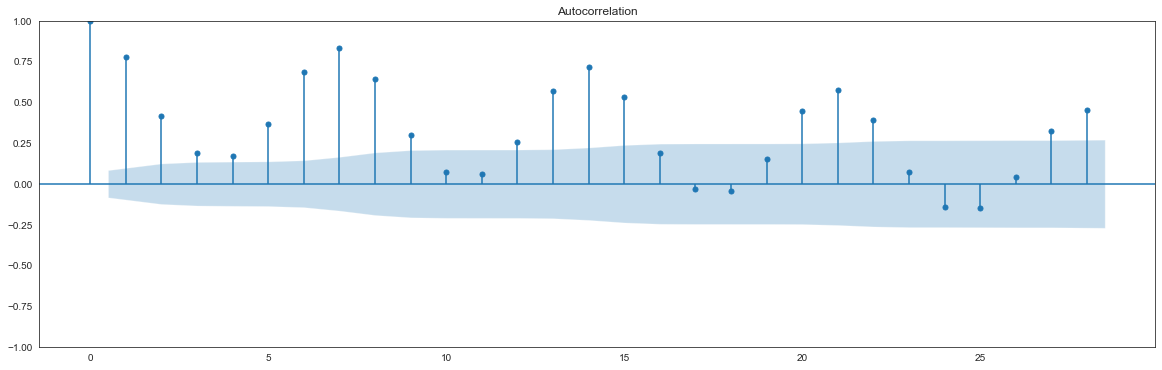

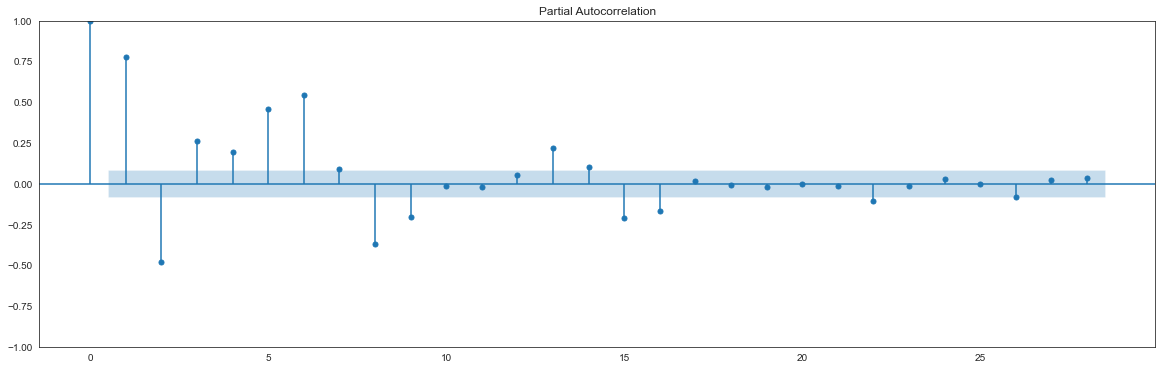

French


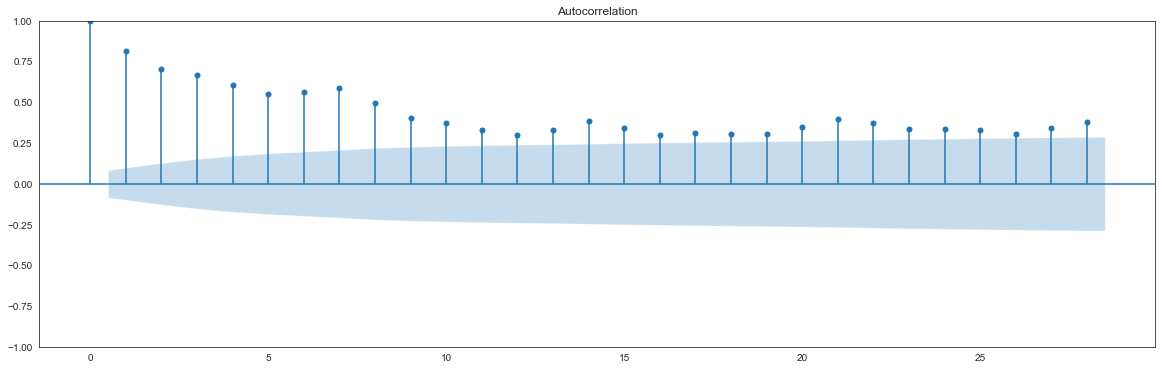

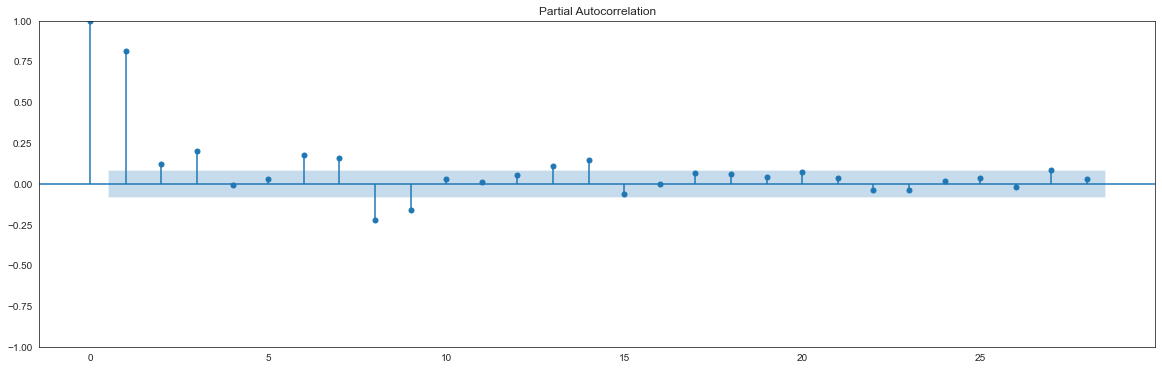

Japanese


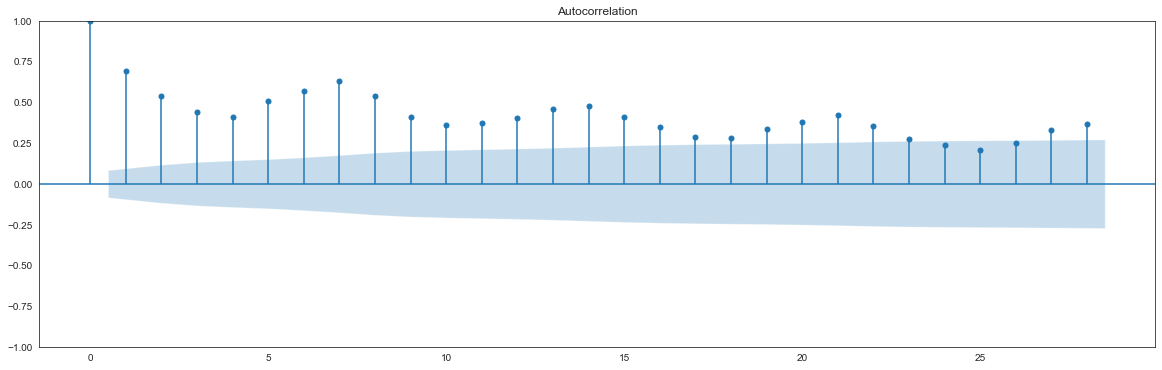

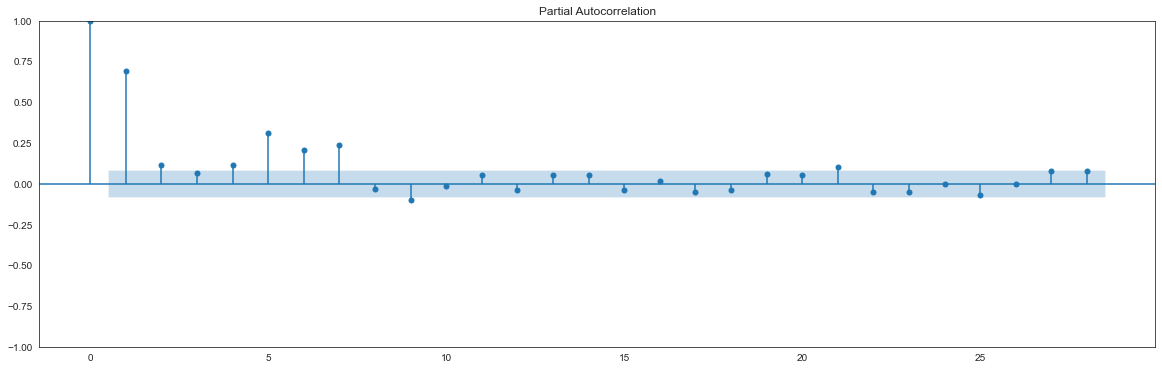

Russian


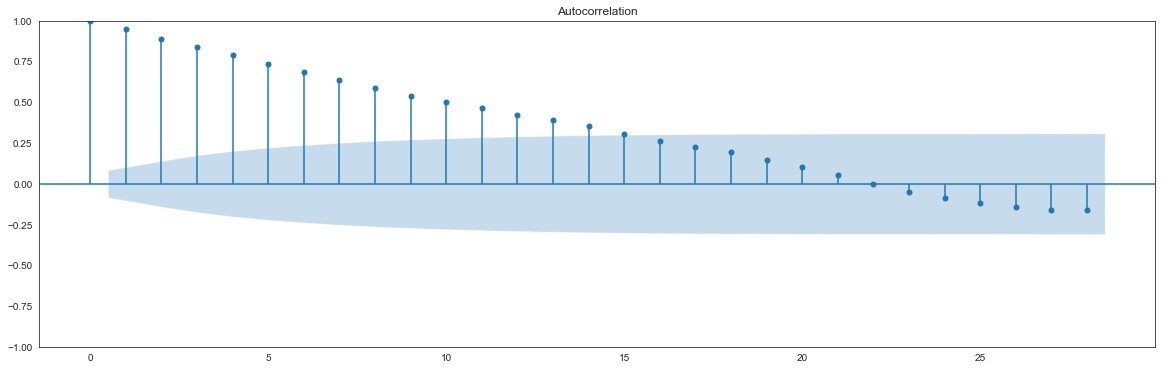

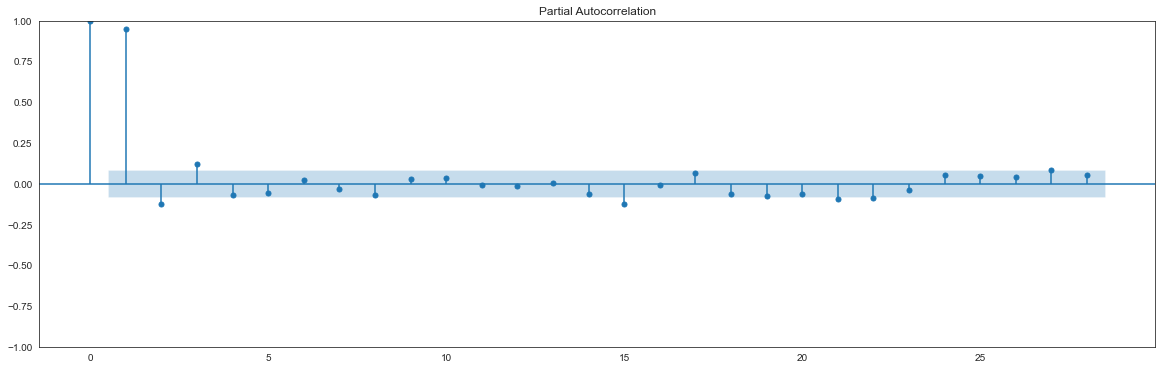

Chinese


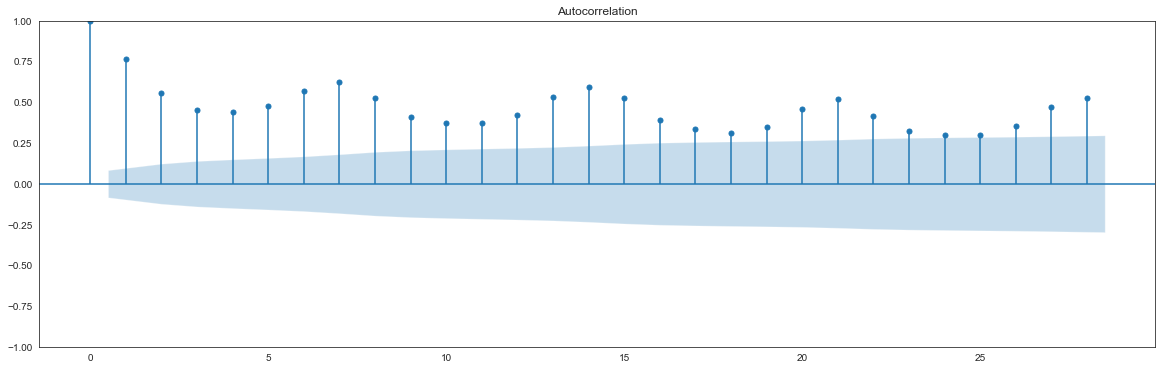

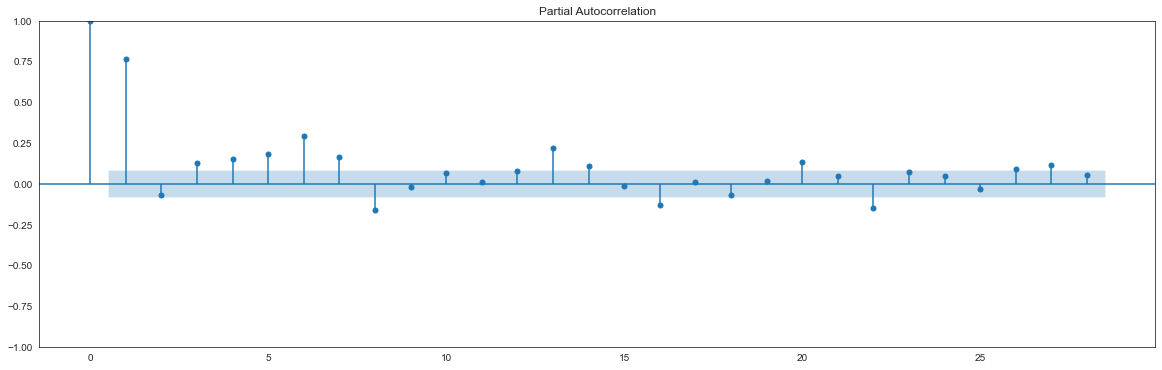

In [40]:
for lang in cols:
    acf_pacf(lang)

### **Training the model**

In [41]:
#Train-Test Split
#Initial 430 days for training and remaining 120 days for testing

train_max_date = df_final.index[-120]
train_x = df_final.loc[df_final.index < df_final.index[-120]].copy()
test_x = df_final.loc[df_final.index >= df_final.index[-120]].copy()

test_x

Language    German  English  Spanish  French  Japanese  Russian  Chinese
Date                                                                    
2016-09-03  719.66  6516.38  1036.19  625.33    891.77   828.01   419.94
2016-09-04  892.21  6713.97  1329.42  721.78    951.58   839.56   453.55
2016-09-05  894.03  6022.37  1569.17  722.26    855.78   809.35   445.80
2016-09-06  846.58  5604.78  1613.55  680.75    829.50   814.09   390.43
2016-09-07  825.82  4991.67  1663.78  692.70    779.55   792.74   371.36
...            ...      ...      ...     ...       ...      ...      ...
2016-12-27 1095.85  6189.33  1138.87  861.95    804.68  1008.12   380.39
2016-12-28 1042.82  6032.64  1184.69  777.26    806.81   938.61   382.56
2016-12-29 1004.51  6425.30  1117.97  755.73    883.43   903.05   354.78
2016-12-30  958.36  5353.68   825.96  703.63    970.88   808.82   358.55
2016-12-31  900.88  5180.35   791.45  648.63   1222.55   886.74   369.83

[120 rows x 7 columns]

### **Performance Function**

In [42]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

### **ARIMA**

In [43]:
train_x.head(2)

Language    German  English  Spanish  French  Japanese  Russian  Chinese
Date                                                                    
2015-07-01  801.43  4120.24  1176.99  526.62    637.64   694.49   306.17
2015-07-02  790.47  4096.97  1125.93  530.04    732.30   706.67   306.18

In [44]:
test_x.head(2)

Language    German  English  Spanish  French  Japanese  Russian  Chinese
Date                                                                    
2016-09-03  719.66  6516.38  1036.19  625.33    891.77   828.01   419.94
2016-09-04  892.21  6713.97  1329.42  721.78    951.58   839.56   453.55

In [45]:
train_arima = train_x.copy()
test_arima = test_x.copy()

In [46]:
def arima(lang):
    pred = 'pred_'+lang[:2]
    #train
    model = SARIMAX(train_arima[lang], order=(3, 1, 3)) 
    model = model.fit(disp=False)
    #predict
    test_arima[pred] = model.forecast(steps=120)
    
    #performance
    performance(test_arima[lang], test_arima[pred])
    #plot
    test_arima[[lang, pred]].plot(style='-o')
    plt.show()

MAE : 106.407
RMSE : 139.778
MAPE: 0.11


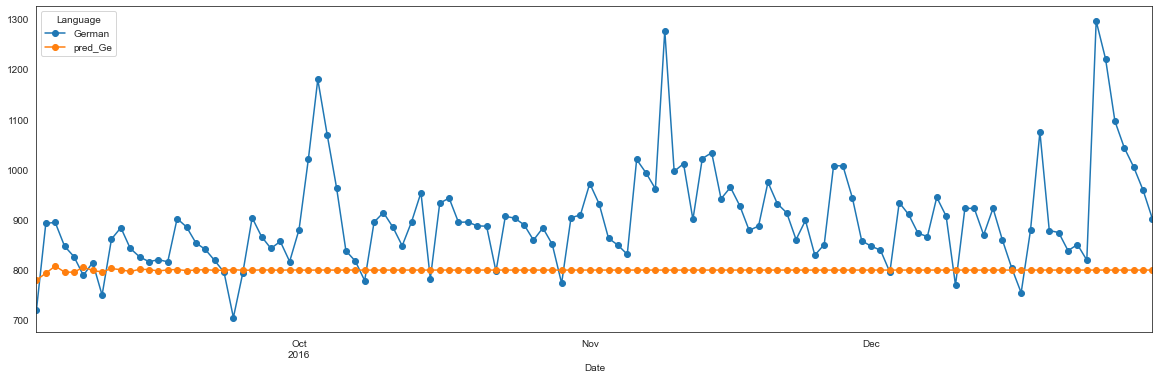

MAE : 442.078
RMSE : 599.479
MAPE: 0.084


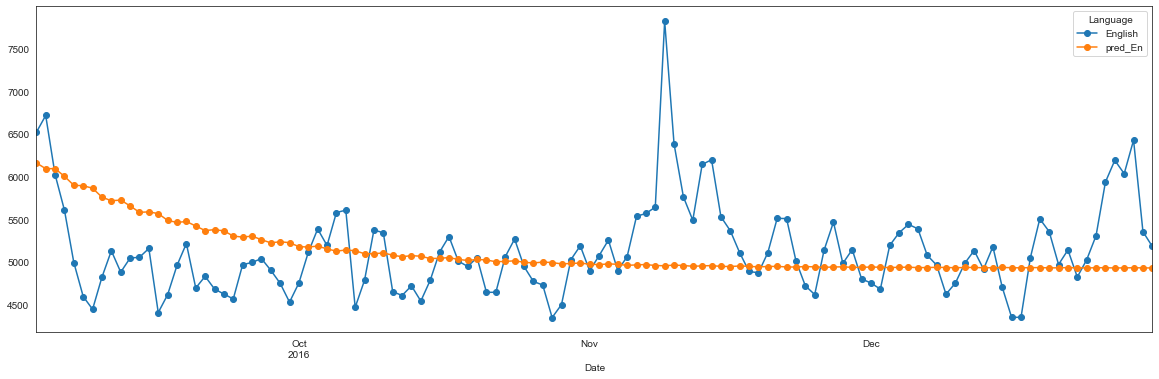

MAE : 194.655
RMSE : 253.75
MAPE: 0.177


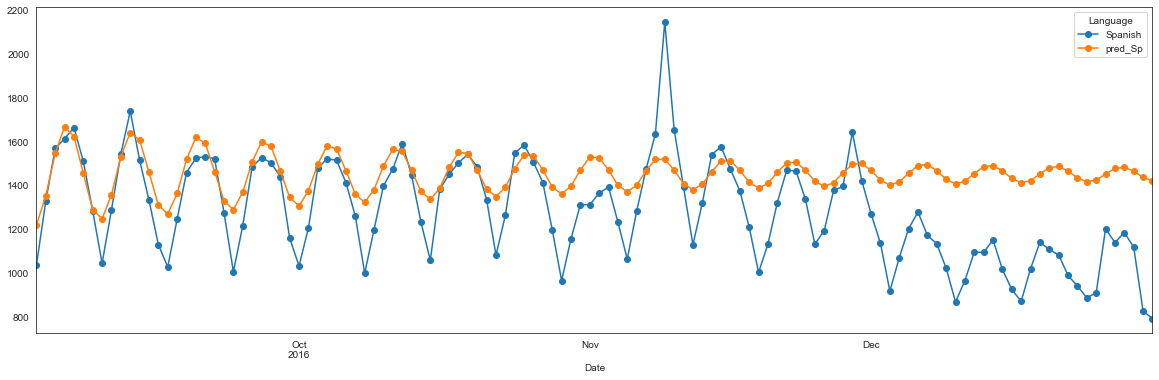

MAE : 73.373
RMSE : 99.652
MAPE: 0.096


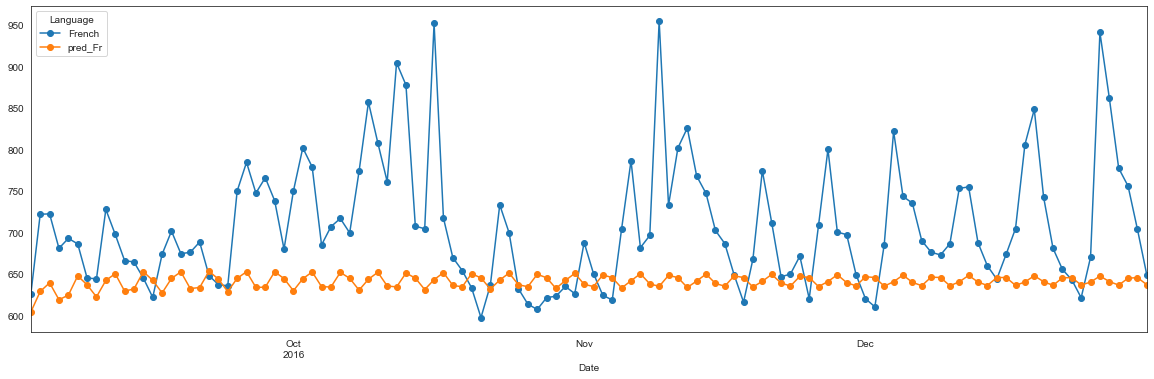

MAE : 93.595
RMSE : 107.862
MAPE: 0.12


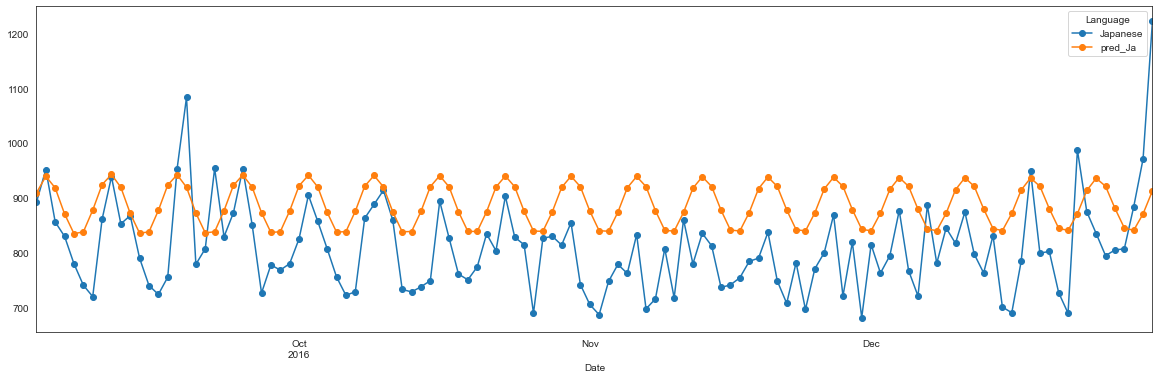

MAE : 72.424
RMSE : 106.246
MAPE: 0.074


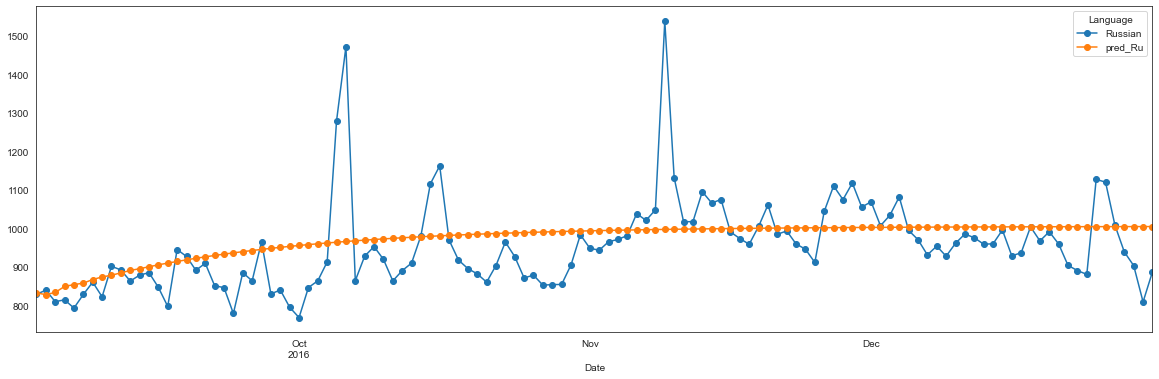

MAE : 27.212
RMSE : 32.978
MAPE: 0.07


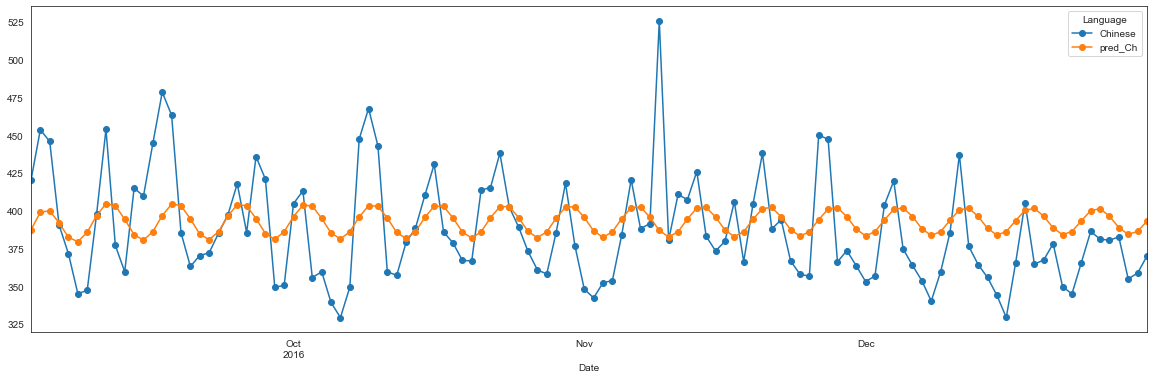

In [47]:
for lang in cols:
    arima(lang)

In [48]:
test_arima.head()

Language    German  English  Spanish  French  Japanese  Russian  Chinese  \
Date                                                                       
2016-09-03  719.66  6516.38  1036.19  625.33    891.77   828.01   419.94   
2016-09-04  892.21  6713.97  1329.42  721.78    951.58   839.56   453.55   
2016-09-05  894.03  6022.37  1569.17  722.26    855.78   809.35   445.80   
2016-09-06  846.58  5604.78  1613.55  680.75    829.50   814.09   390.43   
2016-09-07  825.82  4991.67  1663.78  692.70    779.55   792.74   371.36   

Language    pred_Ge  pred_En  pred_Sp  pred_Fr  pred_Ja  pred_Ru  pred_Ch  
Date                                                                       
2016-09-03   779.22  6159.16  1218.74   603.93   908.75   832.15   387.14  
2016-09-04   792.65  6091.31  1352.96   628.72   939.19   827.60   398.91  
2016-09-05   807.08  6091.45  1545.93   639.14   917.97   833.37   399.86  
2016-09-06   794.91  6001.64  1667.84   618.84   870.48   848.88   391.82  
2016-09-07   794.76  5896.81  1623.14   624.26   834.56   853.68   382.33

### **SARIMAX**

In [49]:
train_sarimax = train_x.copy()
test_sarimax = test_x.copy()

In [142]:
def sarimax(lang):
    pred = 'pred_'+lang[:2]
    #train
    model = SARIMAX(train_sarimax[lang], order=(3, 1, 3), seasonal_order=(1,1,1,15)) 
    model = model.fit(disp=False)
    #predict
    test_sarimax[pred] = model.forecast(steps=120)
    
    #performance
    performance(test_sarimax[lang], test_sarimax[pred])
    #plot
    test_sarimax[[lang, pred]].plot(style='-o')
    plt.show()

MAE : 141.871
RMSE : 174.561
MAPE: 0.149


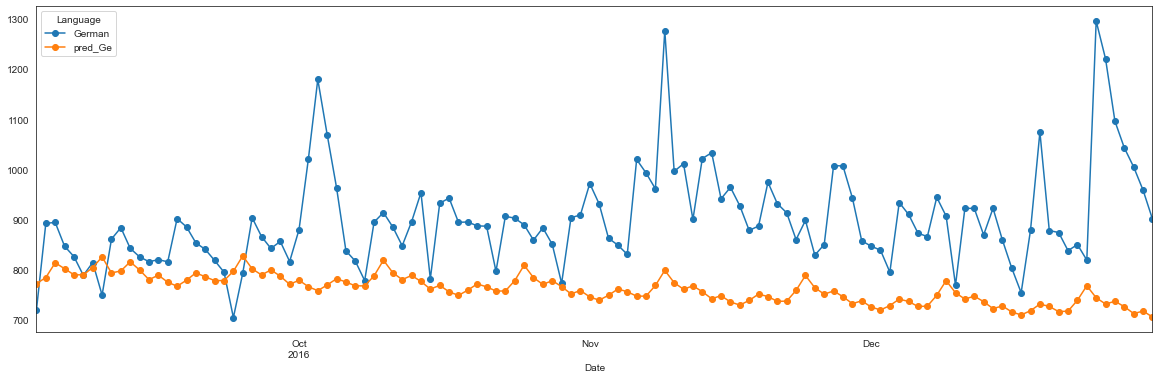

MAE : 1805.587
RMSE : 1874.728
MAPE: 0.362


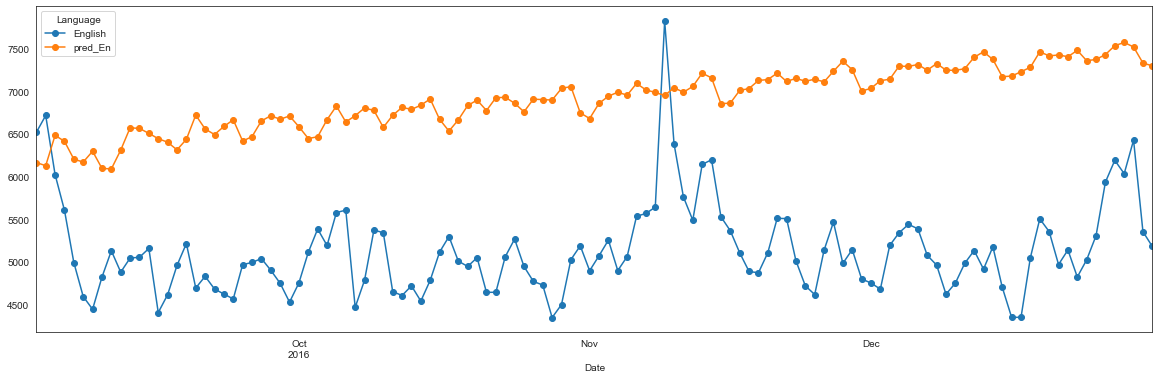

MAE : 198.798
RMSE : 259.971
MAPE: 0.176


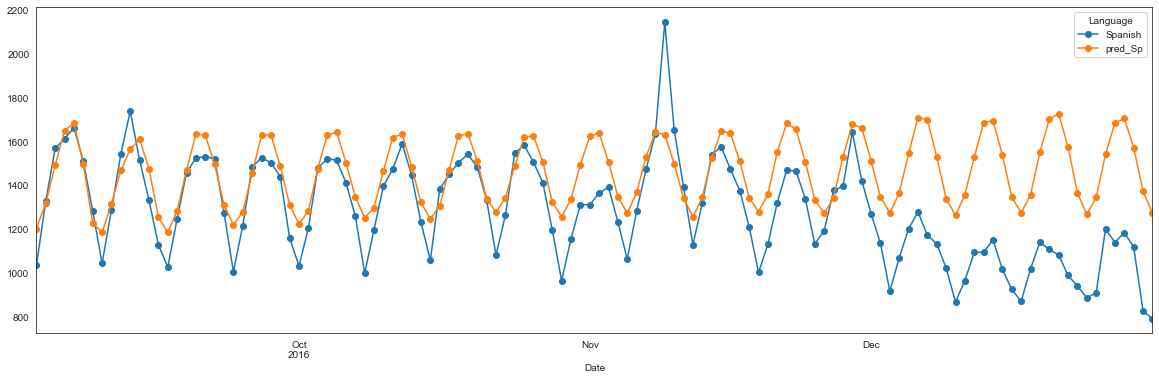

MAE : 82.528
RMSE : 108.155
MAPE: 0.109


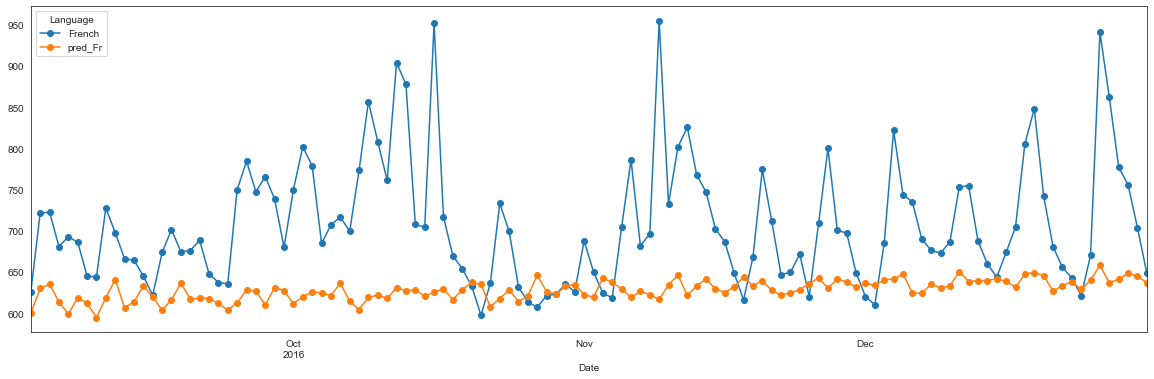

MAE : 98.199
RMSE : 115.268
MAPE: 0.127


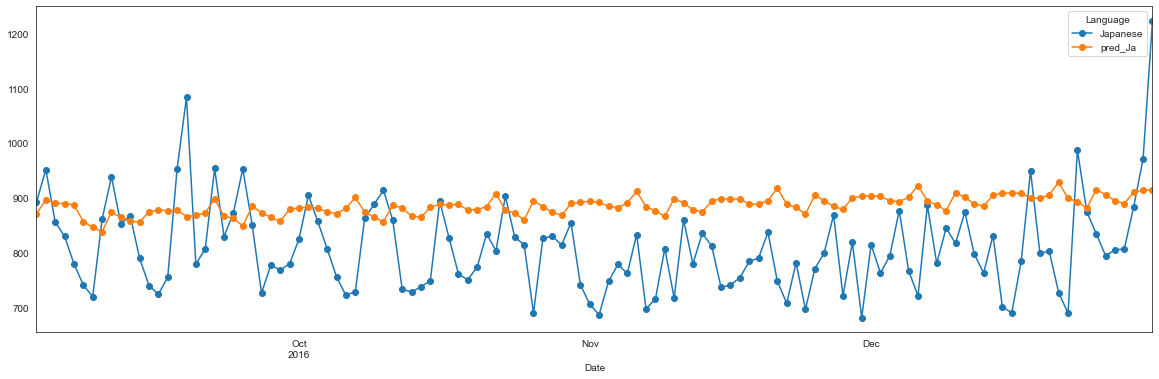

MAE : 109.444
RMSE : 153.99
MAPE: 0.106


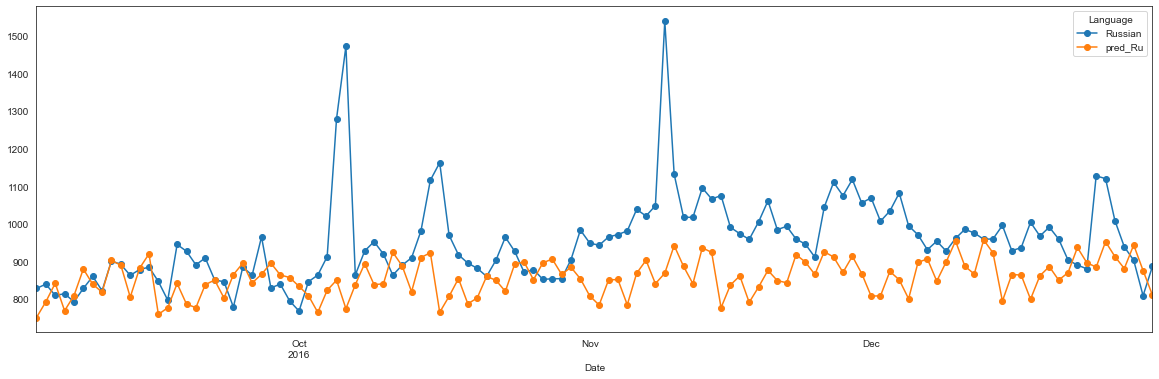

MAE : 52.835
RMSE : 59.915
MAPE: 0.142


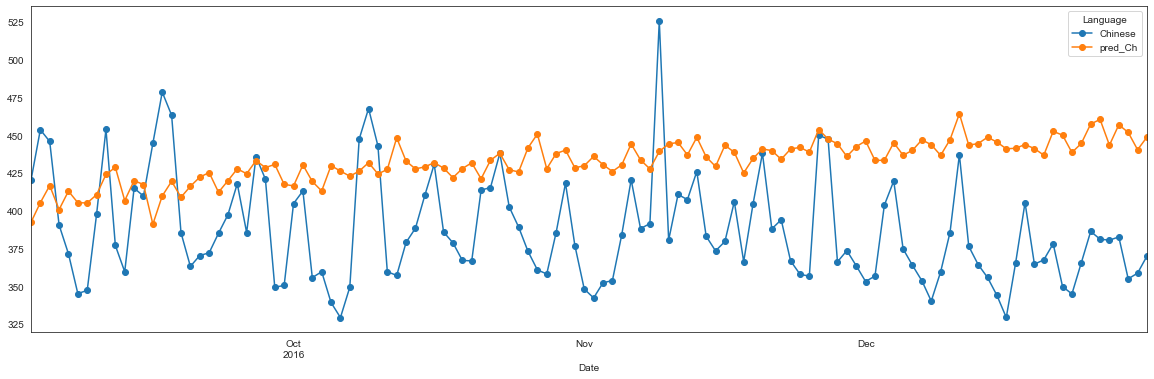

In [143]:
for lang in cols:
    sarimax(lang)

In [52]:
test_sarimax.head()

Language    German  English  Spanish  French  Japanese  Russian  Chinese  \
Date                                                                       
2016-09-03  719.66  6516.38  1036.19  625.33    891.77   828.01   419.94   
2016-09-04  892.21  6713.97  1329.42  721.78    951.58   839.56   453.55   
2016-09-05  894.03  6022.37  1569.17  722.26    855.78   809.35   445.80   
2016-09-06  846.58  5604.78  1613.55  680.75    829.50   814.09   390.43   
2016-09-07  825.82  4991.67  1663.78  692.70    779.55   792.74   371.36   

Language    pred_Ge  pred_En  pred_Sp  pred_Fr  pred_Ja  pred_Ru  pred_Ch  
Date                                                                       
2016-09-03   785.70  6634.94  1280.03   633.38   879.74   741.08   390.49  
2016-09-04   795.36  6870.61  1403.11   629.56   978.98   684.88   409.49  
2016-09-05   797.03  7022.82  1537.28   651.07   930.01   783.42   416.48  
2016-09-06   791.93  7006.72  1525.71   670.98   842.41   813.60   409.91  
2016-09-07   803.45  6896.82  1597.20   681.85   855.78   748.31   401.44

In [125]:
exog.index = df_final.index

MAE : 388.001
RMSE : 471.311
MAPE: 0.078


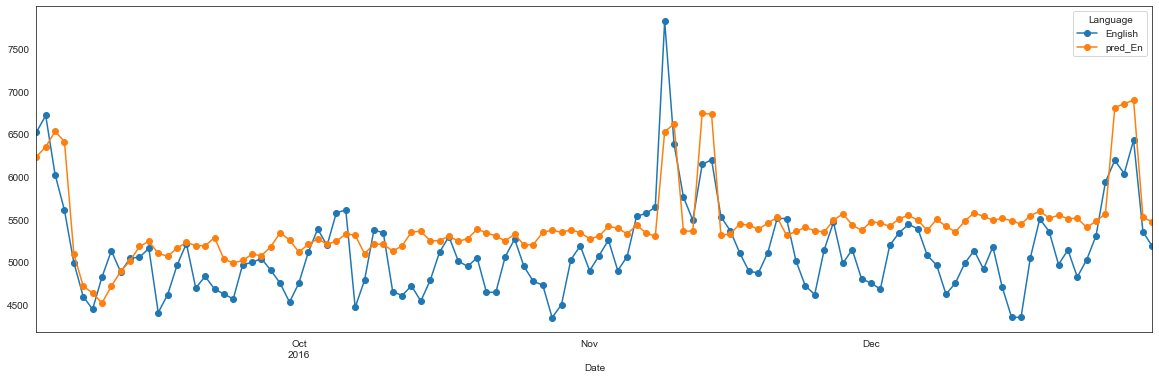

In [141]:
#SARIMAX hyperparameter tuning for english language with exog variable

pred = 'pred_En'
lang = 'English'
#train
model = SARIMAX(train_sarimax[lang], exog=exog['Exog'][:-120], order=(3, 1, 3), seasonal_order=(1,1,1,15)) 
model = model.fit(disp=False)
#predict
test_sarimax[pred] = model.forecast(steps=120, exog=exog['Exog'][430:])

#performance
performance(test_sarimax[lang], test_sarimax[pred])
#plot
test_sarimax[[lang, pred]].plot(style='-o')
plt.show()

# **7. Facebook Prophet**<a id='prophet'></a>

In [53]:
#!pip install pystan~=2.14

In [54]:
#!pip install fbprophet

In [55]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [100]:
def fbprophet(lang):
    print(lang)
    #data preperation
    lg_fb = pd.DataFrame(df_final[lang])
    lg_fb = lg_fb.reset_index()
    lg_fb = lg_fb.rename(columns={'Date':'ds', lang:'y'})
    
    #model training
    m = Prophet()
    m.fit(lg_fb[['ds', 'y']][:-120])
    
    #predict
    future = m.make_future_dataframe(periods=120, freq="D")
    forecast = m.predict(future)
    
    #plot
    fig = m.plot(forecast)
    plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


German
Initial log joint probability = -5.89371
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1048.64     0.0026008       140.307           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       1051.04   0.000562626       131.619   5.965e-06       0.001      290  LS failed, Hessian reset 
     199       1051.37    0.00094089       78.6137      0.3114           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       1051.55   4.59441e-08       64.7195      0.2508      0.7371      386   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


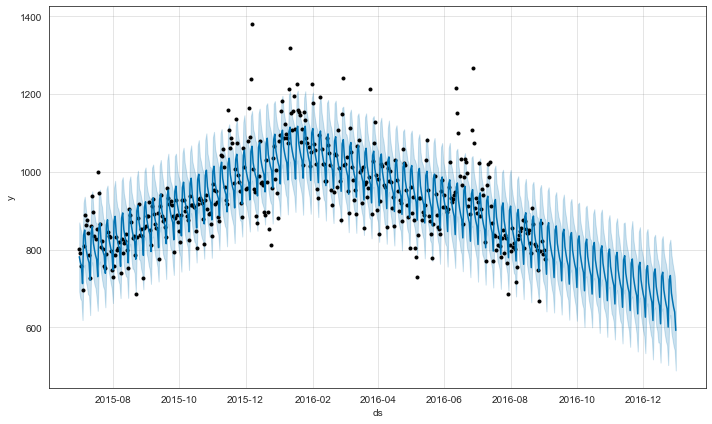

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


English
Initial log joint probability = -4.77779
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       852.483     0.0296244        108.72           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       853.023   0.000714394       83.2624   1.123e-05       0.001      175  LS failed, Hessian reset 
     176       853.834   4.59207e-05       78.6428   5.296e-07       0.001      318  LS failed, Hessian reset 
     199       853.836   8.64481e-08       73.7599     0.07387      0.7232      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       853.836   2.27809e-08       76.1829       0.348       0.348      378   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


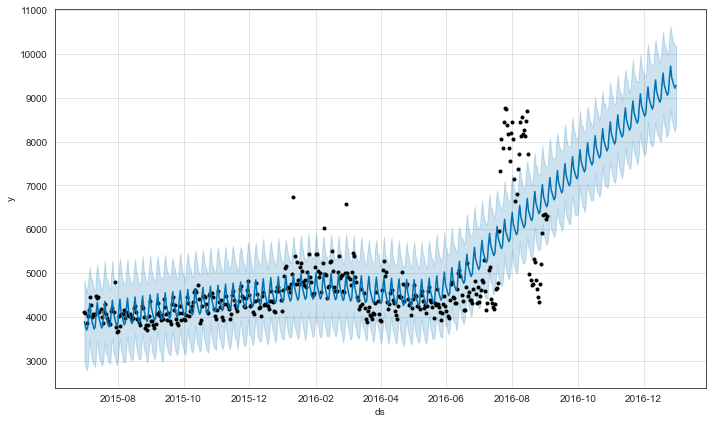

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Spanish
Initial log joint probability = -5.65848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       782.008    0.00173198       58.9945      0.1727      0.8427      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       782.754   0.000126986       61.0624           1           1      268   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       782.761    4.8925e-06       68.4759   6.576e-08       0.001      343  LS failed, Hessian reset 
     299       782.773   1.72631e-06       78.8401       3.039      0.3039      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       782.773   3.48729e-08        58.509      0.2353           1      461   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


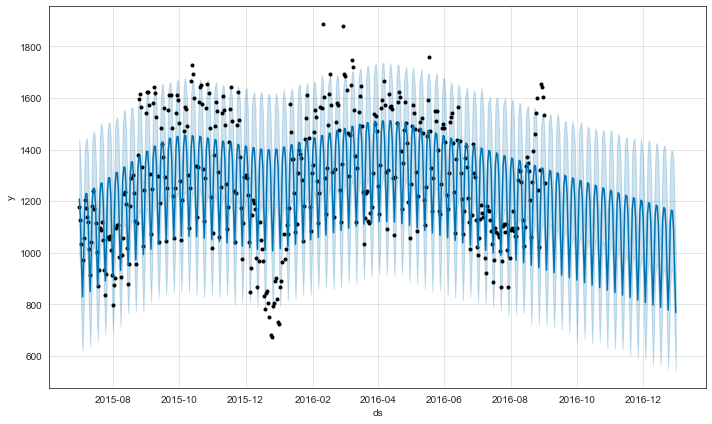

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


French
Initial log joint probability = -5.3482
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       966.607    0.00147995       60.6818           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       966.726   0.000361609       68.9802   6.486e-06       0.001      191  LS failed, Hessian reset 
     193       966.885   3.36249e-08       55.2011      0.1905           1      309   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


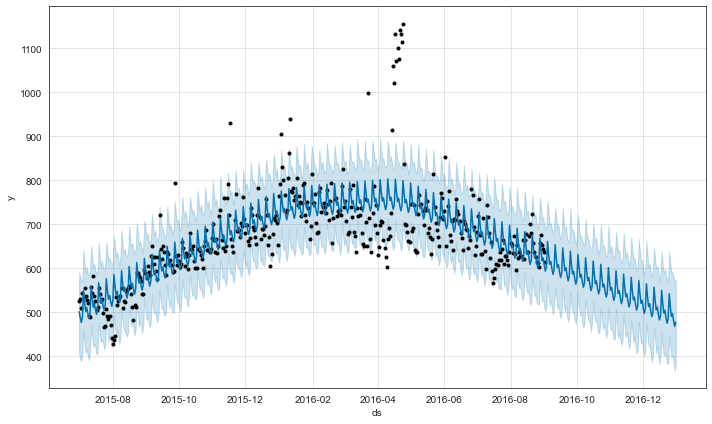

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Japanese
Initial log joint probability = -3.64713
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      69        983.84    0.00258859        179.83   3.865e-05       0.001      136  LS failed, Hessian reset 
      99       984.199    0.00103842       79.6196      0.1532           1      176   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       985.548    0.00234266       70.4823      0.1734       0.588      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       985.563   0.000518408       80.2644   7.355e-06       0.001      341  LS failed, Hessian reset 
     267        985.78   4.79987e-08       59.7733           1           1      427   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


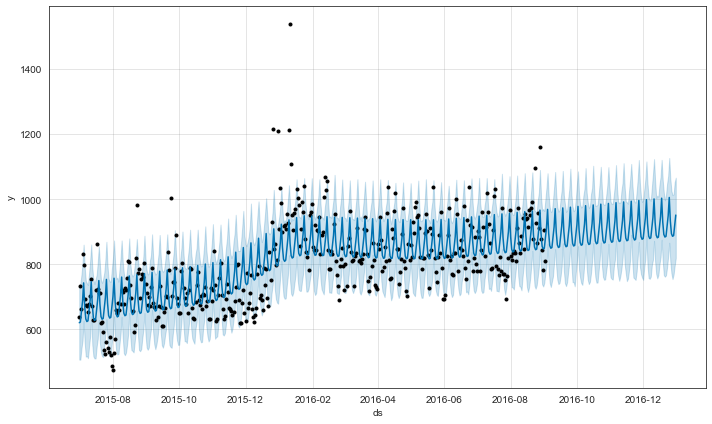

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Russian
Initial log joint probability = -7.8956
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      46       664.923      0.002618       71.1567   2.582e-05       0.001       96  LS failed, Hessian reset 
      99       665.029   0.000133421       92.6439           1           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       665.261    0.00120046       91.1367   1.397e-05       0.001      240  LS failed, Hessian reset 
     170       665.377   5.60699e-05       71.1923   5.877e-07       0.001      344  LS failed, Hessian reset 
     199       665.379    6.3653e-08       83.7333      0.4623      0.4623      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       665.387    3.4734e-05       76.8757   3.823e-07       0.001      478  LS failed, Hessian reset 
     284       665.389   2.53357e-08       85.1242      0.

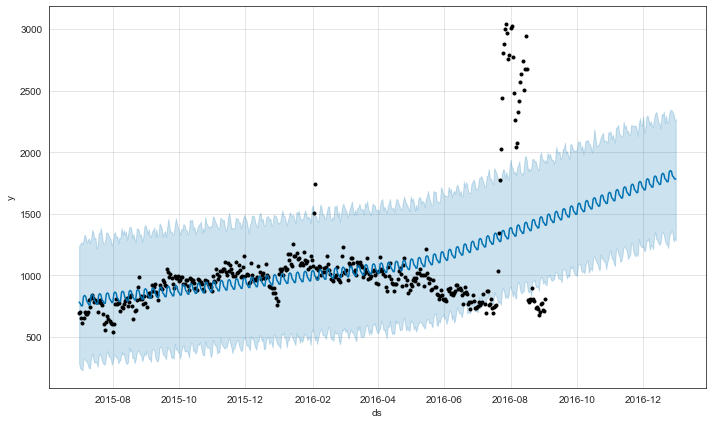

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Chinese
Initial log joint probability = -3.2293
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1097.22   0.000703846       69.9709           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       1097.35   0.000509721        95.313   7.569e-06       0.001      219  LS failed, Hessian reset 
     199        1097.6   0.000384485       74.3992           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       1097.96   0.000592328       134.999   8.317e-06       0.001      488  LS failed, Hessian reset 
     299       1098.05   0.000314379       59.3401        0.67        0.67      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     302       1098.06   4.45446e-05       74.0517   8.393e-07       0.001      567  LS failed, Hessi

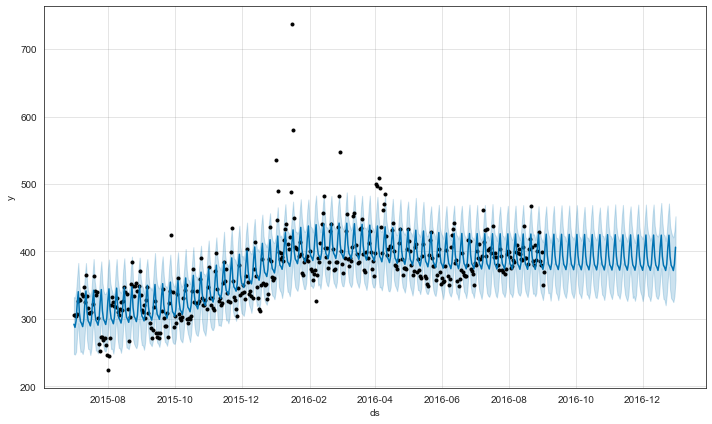

In [101]:
for lang in cols:
    fbprophet(lang)

# **8. Creating a pipeline for working with multiple series**<a id='pipe'></a>

**Functions defined**

1. distribution()
2. moving_avg()
3. adf_test()
4. decomposition()
5. differencing()
6. acf_pacf()
7. performance()
8. arima()
9. sarimax()
10. fbprophet()

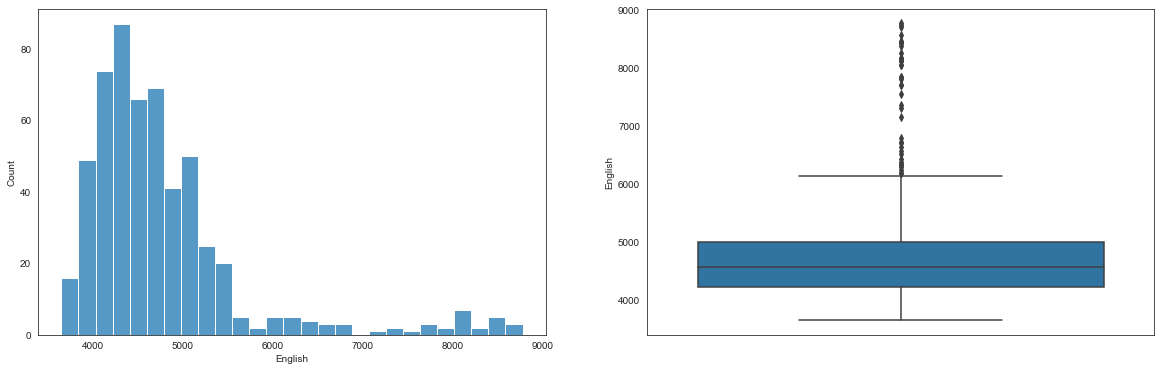

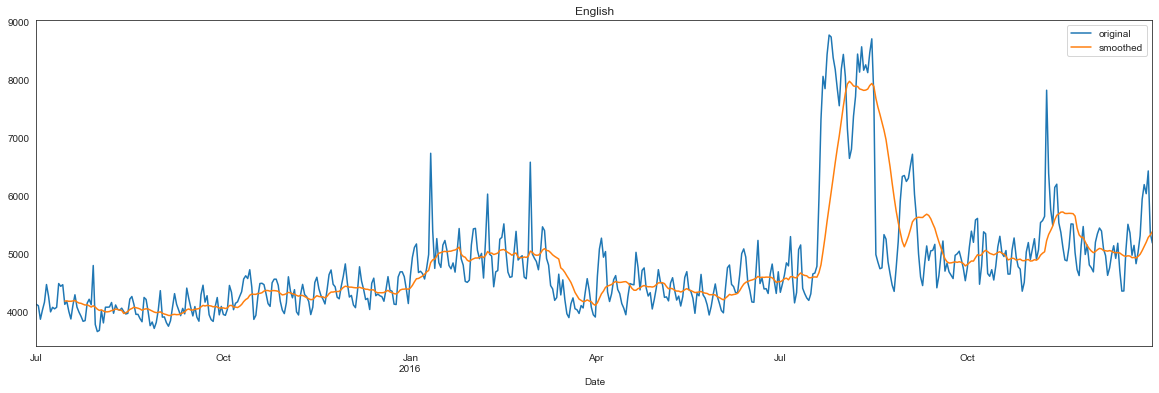

English
pvalue 0.106
Sequence is not stationary
English


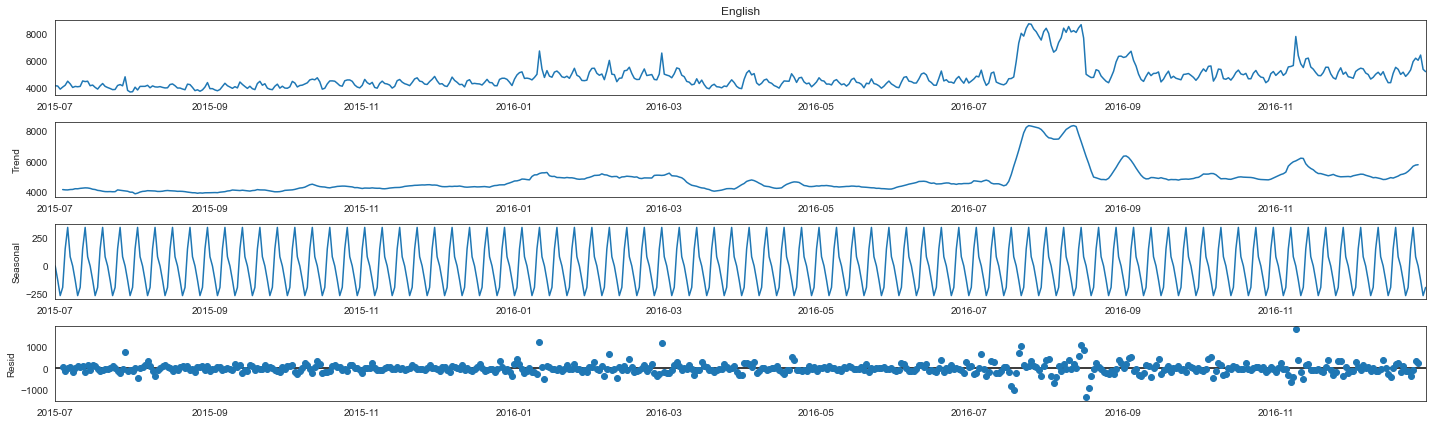

English


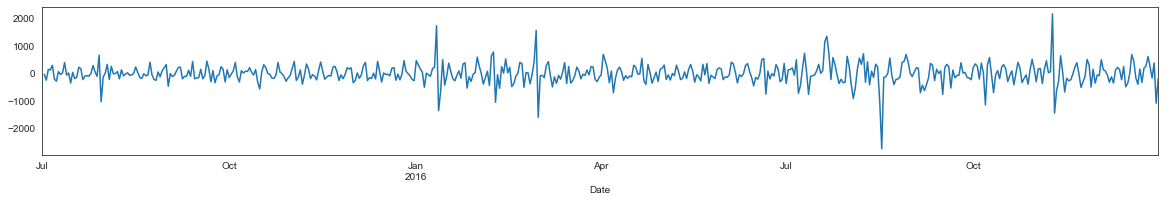

pvalue: daily differencing 3.2130335388918874e-13


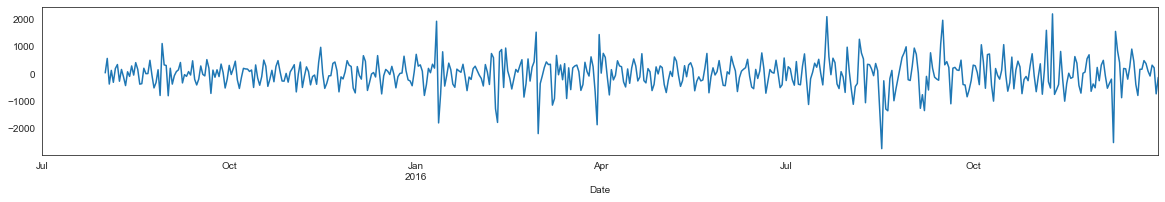

pvalue: monthly differencing 6.848784422049692e-13
English


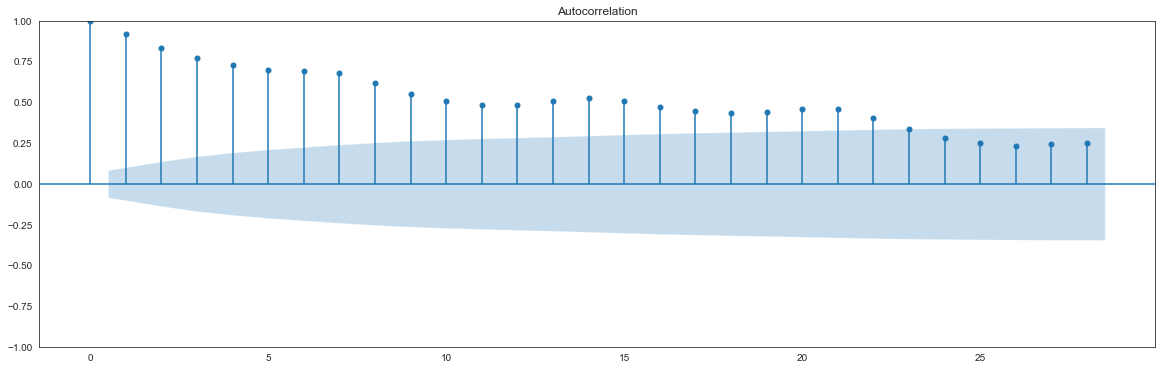

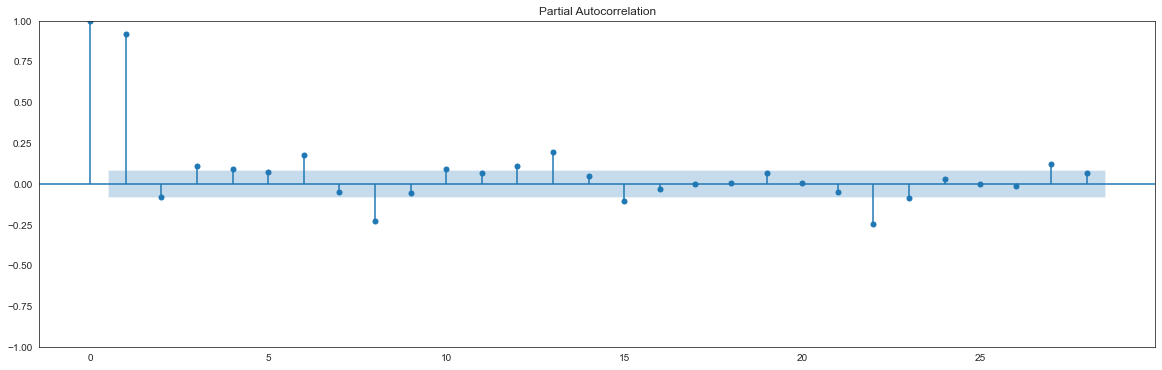

MAE : 442.078
RMSE : 599.479
MAPE: 0.084


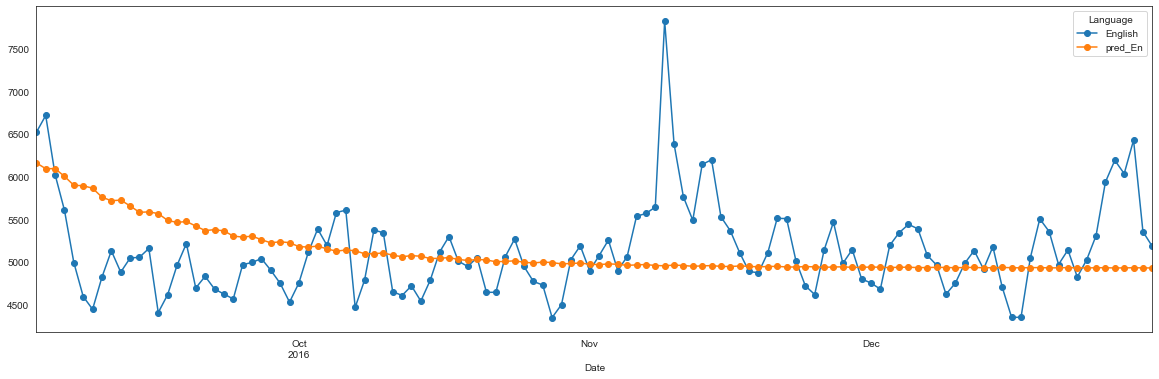

MAE : 1983.148
RMSE : 2054.683
MAPE: 0.396


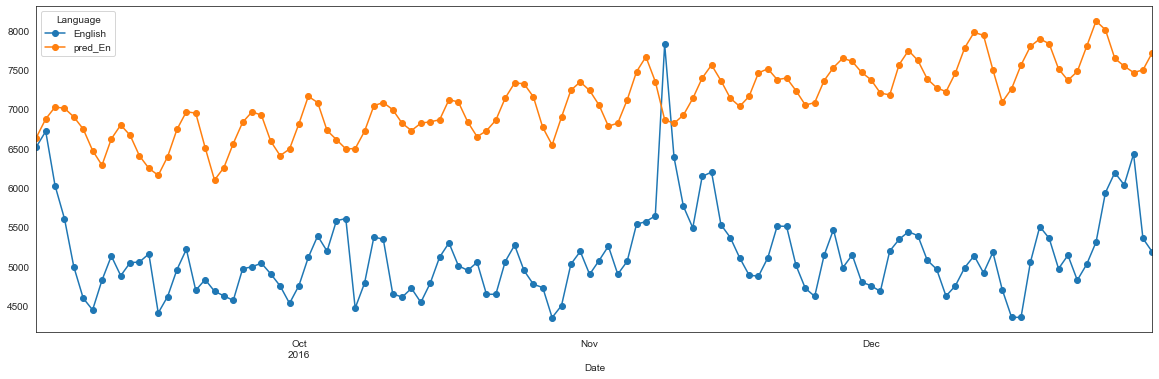

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


English
Initial log joint probability = -4.77779
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       852.483     0.0296244        108.72           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       853.023   0.000714394       83.2624   1.123e-05       0.001      175  LS failed, Hessian reset 
     176       853.834   4.59207e-05       78.6428   5.296e-07       0.001      318  LS failed, Hessian reset 
     199       853.836   8.64481e-08       73.7599     0.07387      0.7232      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       853.836   2.27809e-08       76.1829       0.348       0.348      378   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


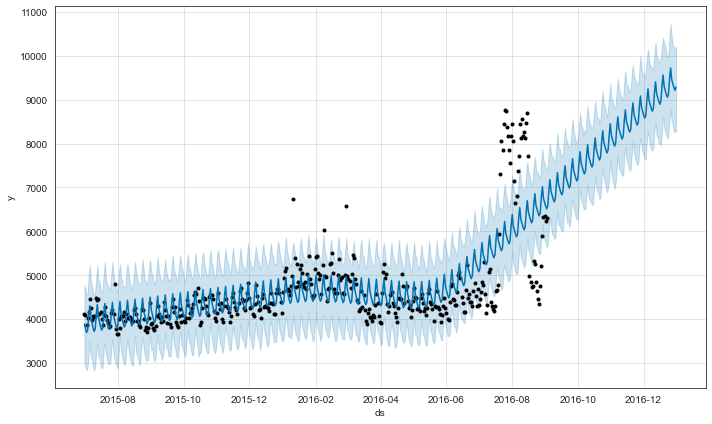

In [107]:
#pass the name of required timeseries in x
x = 'English'
pipe = Pipeline([('distribution', distribution(x)), ('moving_avg', moving_avg(x)), ('adf_test', adf_test(x)),
                ('decomposition', decomposition(x)), ('differencing', differencing(x)), ('acf_pacf', acf_pacf(x)),
                ('arima', arima(x)), ('sarimax', sarimax(x)), ('fbprophet', fbprophet(x))])

# **9. Questionnaire**<a id='Quest'></a>

**1. Defining the problem statements and where can this and modifications of this be used?**<br>
Ans: Problem Statement: Forecasting the number of views of 145k wikipedia pages based on 550 days per page view report so that we can predict and optimize the ad placement for the clients of an ad infrastructure company helping businesses elicit maximum clicks @ minimum cost. Performance report of the ads on pages in different languages will help as the clients belong to different regions.<br><br>

**2. Write 3 inferences you made from the data visualizations**<br>
Ans: 1. Pages in english have the highest number of visits
     2. Pages in Mandarin have the lowest number of visits
     3. Pages in Russian have the highest variability<br><br>
     
**3. What does the decomposition of series do?**<br>
Ans: The decomposition of series will break down the time series into three components, trend, seasonality and residuals<br><br>

**4. What level of differencing gave you a stationary series?**<br>
Ans: Differencing of level 1 has given a stationary series for all the languages. In addition stationarity has been checked with differencing level 12 as well using dickey fuller test which also gave a stationary series<br><br>

**5. Difference between arima, sarima & sarimax.**<br>
Ans: Arima uses an integrated model of auto regression and moving average. Sarima uses seasonality as well in addition to arima model. Sarimax uses exogenous variables as well in addition to all the parameters used in sarima model.<br><br>

**6. Compare the number of views in different languages**<br>
Ans: English has the highest number of views followed by Spanish, Russian and German. Chinease has the lowest number of page visits followed by French and Japanease.<br><br>

**7. What other methods other than grid search would be suitable to get the model for all languages?**<br>
Ans: Random search can also be used other than grid search to get the model and it is faster as well